<a href="https://colab.research.google.com/github/dolmani38/Summary/blob/master/GAN_based_Korean_summarizer_using_semi_abstractive_method_v3.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN based Korean summarizer using semi abstractive method


---
이훈석(1), 안순홍(2), 김승훈(교신)

---

# Abstract

 영어의 경우 Sate of art를 달성한 요약 알고리즘 및 모델들이 개발 되어 졌다. 대부분 GAN 이나 AVE 알고리즘을 이용하여 문장을 생성하는 방식을 기반으로 한다.`[진짜 그런지 확인 조사 필요!!]`
영어의 경우 English Gigaword와 같이 원문과 요약문 데이터셋을 대량으로 구비하고 있어, 요약 모델을 생성하는데 유리하다. 하지만 아직 한국어의 경우 양질의 대량 여약 데이터셋이 준비되어 있지 않다. 하여, 한국어의 경우 좋은 성능의 요약 알고리즘이 아직 연구가 미비하다.
 본 연구에서는 원문에서 요약에 필요한 어절을 추출하여 새로운 요약문을 생성하는 반추상적 방법 (semi abstractive method, SAM) 을 제안한다. SAM방법에 의하면, 대량의 요약문 데이터셋이 없어도 원문을 요약할 수 있으며, 특히, 스토리 흐름이 있는 문서의 경우, 일부 발췌가 아닌 전체 스토리를 요약할 수 있는 장점을 갖는다.


#1. Introduction



ref : https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/

When you open news sites, do you just start reading every news article? Probably not. We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.

Well, It is possible to create the summaries automatically as the news comes in from various sources around the world.

The method of extracting these summaries from the original huge text without losing vital information is called as Text Summarization. It is essential for the summary to be a fluent, continuous and depict the significant.

In fact, the google news, the inshorts app and various other news aggregator apps take advantage of text summarization algorithms.

In this post, I discuss and use various traditional and advanced methods to implement automatic Text Summarization.





> * Types of Text Summarization

> Text summarization methods can be grouped into two main categories: Extractive and Abstractive methods

> * Extractive Text Summarization

> It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

> * Abstractive Text Summarization

> It is a more advanced method, many advancements keep coming out frequently(I will cover some of the best here). The approach is to identify the important sections, interpret the context and reproduce in a new way. This ensures that the core information is conveyed through shortest text possible. Note that here, the sentences in summary are generated, not just extracted from original text.

In the next sections, I will discuss different extractive and abstractive methods. At the end, you can compare the results and know for yourself the advantages and limitations of each method.

#2. Related Work



* Text Summarization using Gensim with TextRank [1]

> gensim is a very handy python library for performing NLP tasks. The text summarization process using gensim library is based on TextRank Algorithm

> What is TextRank algorithm?

> TextRank is an extractive summarization technique. It is based on the concept that words which occur more frequently are significant. Hence , the sentences containing highly frequent words are important .

> Based on this , the algorithm assigns scores to each sentence in the text . The top-ranked sentences make it to the summary.

* Text Summarization with Sumy
> Along with TextRank , there are various other algorithms to summarize text.<br>
> Don’t you think it would be very smooth and beneficial to have a library, which will let you perform summarization through multiple algorithms?<br>
> Fortunately, we already have the sumy library for it !
sumy libraray provides you several algorithms to implement Text Summarzation. Just import your desired algorithm rather having to code it on your own.<br>
> In this section, I shall discuss on implementation of the below algorithms for summarization using sumy :
>> LexRank<br>
> Luhn<br>
> Latent Semantic Analysis, LSA<br>
> KL-Sum<br>

* LexRank [2] (ref : G¨une¸s Erkan. (2004). LexRank: Graph-based Lexical Centrality as Salience in Text Summarization, https://arxiv.org/pdf/1109.2128.pdf)
> First, let me introduce you to summarization with LexRank.
> How does LexRank work?
> A sentence which is similar to many other sentences of the text has a high probability of being important. The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.
> Higher the rank, higher is the priority of being included in the summarized text.

* LSA [3](Latent semantic analysis) (ref:Susan T. Dumais (2005). "Latent Semantic Analysis". Annual Review of Information Science and Technology. 38: 188–230.)
> Latent Semantic Analysis is a unsupervised learning algorithm that can be used for extractive text summarization.<br>
> It extracts semantically significant sentences by applying singular value decomposition(SVD) to the matrix of term-document frequency. To learn more about this algorithm, check out here <br>
> Let me demonstrate how to use LSA for summarization . First, import the summarizer from sumy.

* Luhn [4] (ref:Hans Peter Luhn (1960). Keyword-in-context index for technical literature. American Documentation, 11(4):288–295. ISSN 0002-823)
> Luhn Summarization algorithm’s approach is based on TF-IDF (Term Frequency-Inverse Document Frequency). It is useful when very low frequent words as well as highly frequent words(stopwords) are both not significant.<br>
> Based on this, sentence scoring is carried out and the high ranking sentences make it to the summary.

* KL-Sum [5] (ref:Aria Haghighi, (2009). Exploring Content Models for Multi-Document Summarization)
> Another extractive method is the KL-Sum algorithm. <br>
> It selects sentences based on similarity of word distribution as the original text. It aims to lower the KL-divergence criteria (learn more). It uses greedy optimization approach and keeps adding sentences till the KL-divergence decreases.

* What is Abstractive Text Summarization?

> Abstractive summarization is the new state of art method, which generates new sentences that could best represent the whole text. This is better than extractive methods where sentences are just selected from original text for the summary.<br>

> HuggingFace supports state of the art models to implement tasks such as summarization, classification, etc.. Some common models are GPT-2, GPT-3, BERT , OpenAI, GPT, T5.

>Another awesome feature with transformers is that it provides PreTrained models with weights that can be easily instantiated through from_pretrained() method.

>You can check the list of currently available PreTrained models here

>This section will show you text summarization through different models of transformers library

* Summarization with T5 Transformers [6] (ref : Colin Raffel. (2020). Exploring the Limits of Transfer Learning with a Unified
Text-to-Text Transformer, https://arxiv.org/pdf/1910.10683.pdf)
>T5 is an encoder-decoder model. It converts all language problems into a text-to-text format.<br>
>First, you need to import the tokenizer and corresponding model through below command.<br>
>It is preferred to use T5ForConditionalGeneration model when the input and output are both sequences.

* Summarization with BART Transformers [7] (ref : Mike Lewis, (2019). BART: Denoising Sequence-to-Sequence Pre-training for Natural
Language Generation, Translation, and Comprehension, https://arxiv.org/pdf/1910.13461.pdf)
> transformers library of HuggingFace supports summarization with BART models.
> Import the model and tokenizer. For problems where there is need to generate sequences , it is preferred to use BartForConditionalGeneration model.

* Summarization with GPT-2 Transformers [8] (ref : Alec Radford, (2018). Language Models are Unsupervised Multitask Learners, https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
>GPT-2 transformer is another major player in text summarization, introduced by OpenAI. Thanks to transformers, the process followed is same just like with BART Transformers.<br>
> First, you have to import the tokenizer and model. Make sure that you import a LM Head type model, as it is necessary to generate sequences. Next, load the pretrained gpt-2 model and tokenizer .<br>
>After loading the model, you have to encode the input text and pass it as an input to model.generate().

* Summarization with XLM Transformers [9] (ref : Guillaume Lample, (2019). Cross-lingual Language Model Pretraining, https://arxiv.org/pdf/1901.07291.pdf)
>Another transformer type that could be used for summarization are XLM Transformers.<br>
>You can import the XLMWithLMHeadModel as it supports generation of sequences.You can load the pretrained xlm-mlm-en-2048 model and tokenizer with weights using from_pretrained() method.<br>
>The nexts steps are same as the last three cases. The encoded input text is passed to generate() function with returns id sequence for the summary. You can decode and print the summary.<br>

* GAN for Language Generation
> In this paper, we borrow the idea of GAN to make the generator output human-readable. The major challenge in applying GAN to sentence generation is the discrete nature of natural language. To generate a word sequence, the generator usually has non-differential parts such as argmax or other sample functions which cause the original GAN to fail.
In (Gulrajani et al., 2017), instead of feeding a discrete word sequence, the authors directly feed the generator output layer to the discriminator.
This method works because they use the earth mover’s distance on GAN as proposed in (Arjovsky et al., 2017), which is able to evaluate the distance between a discrete and a continuous distribution.
SeqGAN (Yu et al., 2017) tackles the sequence generation problem with reinforcement learning. Here, we refer to this approach as adversarial REINFORCE. However, the discriminator only measures the quality of whole sequence, and thus the rewards are extremely sparse and the rewards assigned to all the generation steps are all the same. MC search (Yu et al., 2017) is proposed to evaluate the approximate reward at each time step, but this method suffers from high time complexity.
Following this idea, (Li et al., 2017) proposes partial evaluation approach to evaluate the expected reward at each time step.


#3. Proposed Method

본 논문에서 제안하는 방법은 Extractive 방식을 조합한 Semi Abstractive method라 할 수 있다. 원문을 어절별로 모두 나누고 이를 재조합하여 전체 내용을 요약한 몇개의 문장을 생성한다.

 이를 위해, Generator는 원문 어절의 개수 만큼의 noise를 input으로 받으며 
원문 어절의 개수 만큼의 output을 갖는다. 이때 output은 각 원문의 어절이 요약에 활용되는 확율값에 해당한다. 따라서, 특정 확율값 또는 주어진 어절의 개수에 해당하는 상위 순위의 확률값에 해당하는 어절을 선택하여 요약문을 생성한다. Similarity function과 keyBERT 기법에 의해서 원문으로부터 골자 어절들(frame terms)을 추출하고 이를 Generator에 bias로 입력한다. 이를 통해 Generator는 주요 어절들에 높은 확률값을 우선 할당하며, 이후 한국어 문법 discriminator에 의해 임의 생성된 문장이 문법적으로 사람이 읽을 수 있는 문장인지 구분한다. 또한 원문 유사성을 구분하는 유사도 discriminator에 의해 임의 생성된 문장이 원문 내용과 상이하지 않도록 조정한다.
전체 아키텍처는 아래 그림과 같다. 


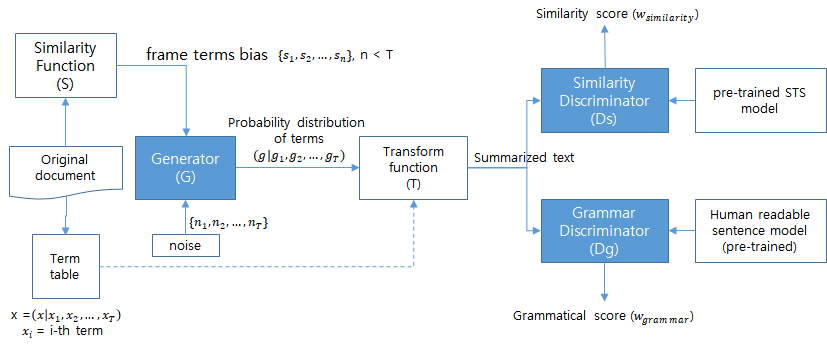

##3.1 Similarity function을 이용한 frame term의 추출


Document를 Term 단위로 나눈다. 각각의 Term을 xi 라고 할 때 Document는 다음과 같이 나타낼 수 있다.

Document 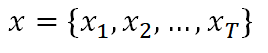

Document의 유사 확률을 측정하는 함수를 S라고 하면, xi 에 대한 유사성 Probability는 다음과 같이 나타낼 수 있다.

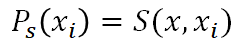

전체 document의 flow는 Similarity Probability Distribution, SPD를 아래와 같이 나타낼 수 있다.

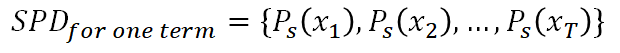

이를 연속적 Signal 이라 보고, Signal의 peak에 해당하는 term을 추출하여 이를 전체 document의 요약에 해당하는 frame term으로 구성하고자 한다.


그러나 document story상, 주인공을 지칭하는 term의 경우 전체 Similarity에 지배적 영향을 주게되고 signal의 peak는 해당 term들로만 구성 될 수가 있다. 결국, 원하는 frame 얻지 못하게 된다. 이를 극복하기 위한 방법으로 복수의 term으로 구성된 story line의 SPD를 산출하여 사용한다. 만약 2개의 term인 경우 Similarity Probability는 다음과 같다.

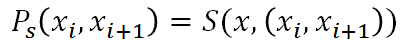

이때, 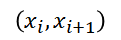 의 구성은 일종의 partial story 로서 filter의 역할을 하고, 전체 document를 convolution 한다.
만약 N개의 term을 filter로 사용한다면, 

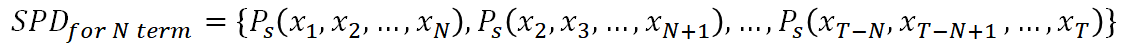

과 같이 된다. 

m개의 filter를 이용하여 frame terms = s 를 아래와 같이 구성한다면

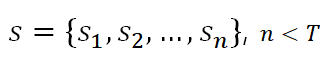

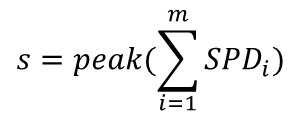

하지만 여기서 문제점은 SPD1~m 에서도 역시 주인공과 같은 지배적 term에 peak가 몰리고 story line에 해당하는 frame 추출되지 못 할 수 있다는 것이다. 이를 극복하기 위해, peak를 추출하기 전에 SPD1의 값을 빼서 지배적 term의 peak를 회피하고 story line에 해당하는 frame을 추출 할 수 있도록 한다.

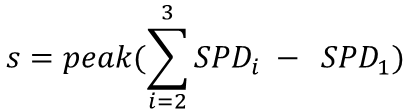

###3.1.1 Similarity function, S (Sentence-BERT)

(ref :Nils Reimers and Iryna Gurevych, (2019). Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks ,https://arxiv.org/pdf/1908.10084.pdf)
를 기반으로 구현한다.

BERT (Devlin et al., 2018) is a pre-trained transformer network (Vaswani et al., 2017), which set for various NLP tasks new state-of-the-art results, including question answering, sentence classification, and sentence-pair regression. The input for BERT for sentence-pair regression consists of the two sentences, separated by a special [SEP]
token. Multi-head attention over 12 (base-model) or 24 layers (large-model) is applied and the output is passed to a simple regression function to derive the final label. Using this setup, BERT set a new state-of-the-art performance on the Semantic Textual Semilarity (STS) benchmark (Cer et al.,2017). RoBERTa (Liu et al., 2019) showed, that
the performance of BERT can further improved by small adaptations to the pre-training process. We also tested XLNet (Yang et al., 2019), but it led in general to worse results than BERT.

Sentence-BERT(SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT.

SBERT adds a pooling operation to the output of BERT / RoBERTa to derive a fixed sized sentence embedding. We experiment with three pooling strategies: Using the output of the CLS-token, computing the mean of all output vectors (MEAN strategy), and computing a max-over-time of the output vectors (MAX-strategy). The default configuration is MEAN.

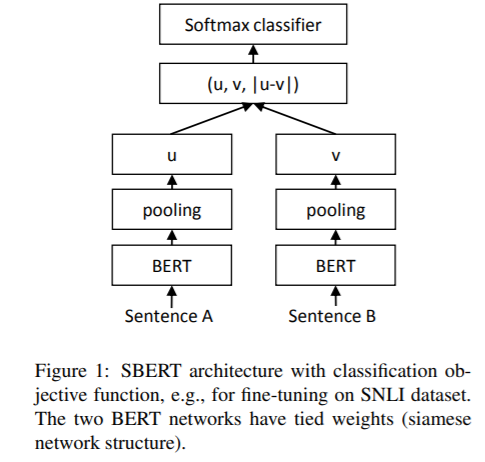

SBERT를 활용할 수 있는 pretrained model은 https://www.sbert.net/docs/pretrained_models.html 여기서 확인 할 수 있다.

본 논문에서는  한국어로 학습된 'xlm-r-large-en-ko-nli-ststb' 모델을 사용하였고, 이 모델의 STS Benchmark score는 84.05% 이다.



##3.2 keyBERT을 이용한 frame term의 추출

ref:Sharma, P., & Li, Y. (2019). Self-Supervised Contextual Keyword and Keyphrase Retrieval with Self-Labelling. https://www.preprints.org/manuscript/201908.0073/download/final_file

##3.3 한국어 문법 Discriminator, D

https://analyticsindiamag.com/how-to-use-bert-transformer-for-grammar-checking/

Jacob Devlin, (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding


* Impact of the BERT model<br>
BERT is a language representation model trained by huge data, huge models, and enormous computational overhead. It is optimal in 11 natural language processing tasks (state-of-the-art) , SOTA) results. It is estimated that many people will ridicule experiments of this scale, which are basically out of reach for general laboratories and researchers, but it does give us a lot of valuable experience. The reason for the high-performance of the BERT model is due to two points. In addition to the improvement of the model, it is more important to use a large data set (BooksCorpus 800M + English Wikipedia 2.5G words) and a large computing power. Pre-training on related tasks, achieving monotonous growth in performance on target tasks.
<br>
* Overview of Task<br>
Now the task which we are to do is to predict whether a sentence is grammatically correct or not. We choose a dataset in which we are given a piece of text and along with it a label .which is referred to as the “whether it is grammatically correct or not”.<br>
0 means grammatically incorrect and 1 means grammatically correct.<br>
So essentially this problem translates into a text classification problem where we classify whether a sentence is grammatically correct or not.

* Getting started with Modeling<br>
We’ll use [The Corpus of Linguistic Acceptability (CoLA)](https://nyu-mll.github.io/CoLA/) dataset for single sentence classification. It’s a set of sentences labelled as grammatically correct or incorrect. It was first published in May of 2018 and is one of the tests included in the “GLUE Benchmark” on which models like BERT are competing

* 그래서 한국어 문장 Dataset을 만들어서, BERT로 학습 시킴, 이를 문법 Discriminator로 사용한다.

* 정상 문장의 경우 label = 1, 문법적으로 비정상 문장은 label = 0 으로 labeling
비정상 문장은 정상문장을 그래로 shuffling 해서 만듦.

## 3.4 한국어 Text Generator, G


원문의 전체 term의 개수에 해당하는 random noise를 입력받는다. 2번째 입력은 frame terms 
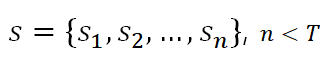
을 bias로서 입력 받는다.
random noise 는 dense layer 몇 개를 거치면서 deep network을 형성하지만 frame terms bias는 동일 차원의 output 바로 직전에 deep network의 output tensor에 add 된다. 이로서 전체 output은 frame terms에 bias 되어 원문이 요약된 문장이 생성된다. 또한 random noise에 의해 frame terms 각각의 사이에 적절한 term이 원문에서 추출 되는 것이다.
 이후, 생성된 probability distribution은 아래의 조건에 의해서 선택되어진다.

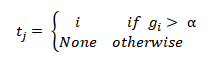

여기서 [알파] 값을 조절 하므로 생성되는 text의 길이를 조절 할 수 있다. 적절한 [알파]값을 통해 문법적으로 읽을 수 있는 글이 생성된다. 
마지막으로 선택된 t vector는 x에서 선택된 order에 해당되거 x[t] 연산에 의해서 text가 생성된다.


전체적인 구성은 아래와 같다. 


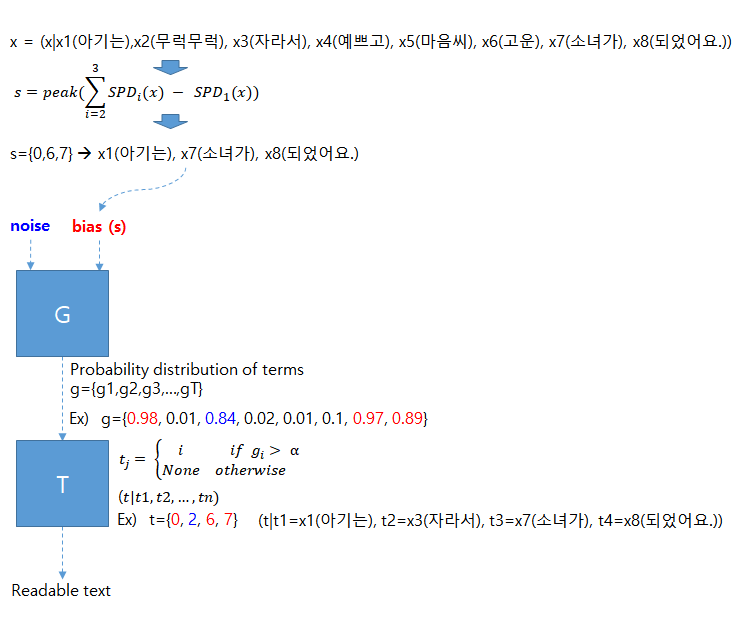

##3.5 GAN Training



GAN의 논문 (ref:Ian J. Goodfellow, (2014). Generative Adversarial Nets, https://arxiv.org/pdf/1406.2661.pdf) 에서 보면 value function V(G,D)에 대하여 다음을 만족시키는 과정에 의하여 학습이 이루어 진다.


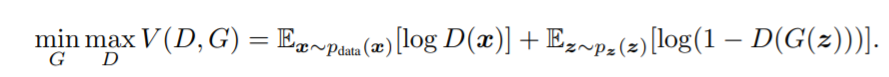

즉, D에 대한 cross-entory 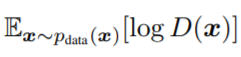 와 G에 대한 cross-entropy 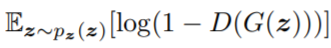 에 대한 최적화의 과정임을 알 수 있다. 

본 논문에서 다루는 전체 목적함수는 아래와 같이 나타낼수 있다.

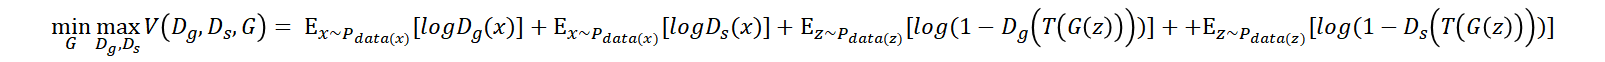

문제는 Discriminator 전에 Transform function T에 의해 G에서 생성한 probability distribution을 readable text 로 변환 하는 과정이 있는 것이다. 즉, T는 미분 불가능한 절차적 함수로서 D(T(G(z)))는 학습에 필요한 backward를 할 수 없다. 

이러한 문제는 GAN을 통한 Text 생성 알고리즘에서 빈번히 봉착하는 문제이며 논문 (ref : Yau-ShianWang, (2018). Learning to Encode Text as Human-Readable Summaries using Generative Adversarial Networks) 에서는 'Self-Critic Adversarial REINFORCE'을 제안하였다. 해당 기법에서는 Since we feed a discrete sequence ys to the discriminator, the gradient from the discriminator cannot directly back-propagate to the generator. Here, we use the policy gradient method. At timestep i, we use the i 􀀀 1 timestep score si􀀀1 from the discriminator as its self-critical baseline. The reward rD i evaluates whether the quality of sequence in timestep i is better or worse than that in timestep i 􀀀 1. The generator reward rD i from D2 is

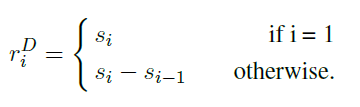

However, some sentences may be judged as bad sentences at the previous timestep, but at later timesteps judged as good sentences, and vice-versa. Hence we use the discounted expected reward d with discount factor  to calculate the discounted reward di at time step i as

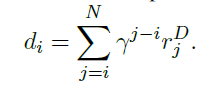

To maximize the expected discounted reward di, the loss of generator is:

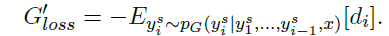

We use the likelihood ratio trick to approximate the gradient to minimize 

하지만 이러한 방식은 LSTM에 의한 timeseries로 접근 할 때 가능하며, discounted reward d의 적용은 loss의 미분 폭이 매우 좁아서, 상당히 많은 시행 (epoch)과정이 필요하다.

따라서 본 논문에서는 cross-entropy를 loss로 사용하지 않고 변형된  wasserstein distance (Martin Arjovsky, (2017). Wasserstein GAN, https://arxiv.org/pdf/1701.07875.pdf)를 사용고자 한다. 

G(z)의 output (g|g1,g2,...gT)에 대하여 T 함수는 내부에 다음의 과정이 있다. 



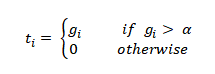

위에서 [알파]의 값은 요약 결과고 얻고자 하는 어절의 개수에 따라 결정된다. [알파]값이 크면 요약 결과 어절의 수가 작아지고 알파값이 작을 수로 요약 어절의 수가 많아 진다.

T(G(z))의 output의 예를 들면 다음과 같다.
(t|t1,t2,...tT) ~ (t|g1,0,0,g4,0,g6,...,0,gT)

이때
D(T(G(z))) = w

우리는 wasserstein distance을 loss로 사용하기 위해 

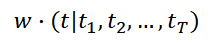

을 output으로 설정한다.

결과적으로 Generator의 loss는

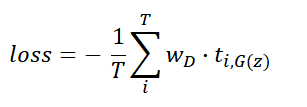

이렇게 함으로서 ti는 G의 output (g|g1...gT)의 일부로서, 미분가능 하고 backward를 통해 학습이 이루어 질 수 있다.

전체 목적 함수는 아래와 같다.

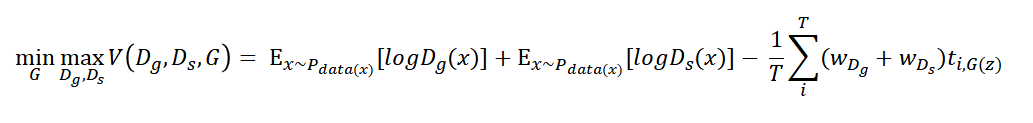

문법, 유사도 측정을 위한 각 Discriminator는 pre-trained model을 이용하여 일반화된 구분자로서 적용하였다.
그러나, 학습의 과정에서 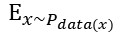

를 정의 할 수 없다. 이미, 요약된 실데이터를 만들수 없기 때문이다. 
그래서, 원문의 일부 문장을 대입하였더니, 학습이 진행되면서 원문의 일부로 overfitting 되는 경향이 나타났다. 즉, Extractive 방법의 결과로 수렴되는 것이다.
그래서, 본 논문에서는 Discriminator가 이미 pre-trained model에 의해 학습되어 있으므로 Discriminator를 학습에 참여 시키지 않았다. 따라서 최종 목적함수는 아래와 같이 단순화 하였다.

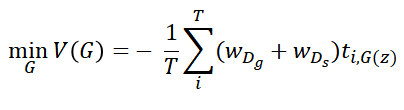

#4. Implementation


## 4.1 기본 설정...

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keybert
!pip install sentence-transformers==0.3.0
!pip install transformers==3.0.2

     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 1.8MB 20.9MB/s 
     |████████████████████████████████| 1.2MB 50.0MB/s 
     |████████████████████████████████| 2.9MB 56.7MB/s 
     |████████████████████████████████| 890kB 53.8MB/s 
  Created wheel for keybert: filename=keybert-0.1.3-cp36-none-any.whl size=8860 sha256=4fb61eff9edbd94787048f67ae7b50cc502684f3d7e2ae8976a96ae49319ce03
  Stored in directory: /root/.cache/pip/wheels/9c/0f/28/4d2071a9b35616ddf030a5affff9d13eb07dd9db8185e9b858
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=b9b7be1f98bd8cc5b399f15c56d25a391be933d0ddd377f50929d08795392a21
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=7582b45b17f060a2b9a4e441689897ed4a7a5f7bf51347f54602df14576c5d26
  Stored in

In [3]:
import matplotlib.pyplot as plt
# set seeds for reproducability
from numpy.random import seed
seed(1)

import pandas as pd
import numpy as np
import string, os 

import urllib.request
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [5]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [6]:
# Print iterations progress
class ProgressBar:

    def __init__(self,total=20, prefix = '', suffix = '', decimals = 1, length = 20, fill = '|', printEnd = "\r"):
        self.total = total
        self.prefix = prefix
        self.suffix = suffix
        self.decimals = decimals
        self.length = length
        self.fill = fill
        self.printEnd = printEnd
        self.ite = 0

    def printProgress(self,iteration, text):
        self.ite += iteration
        percent = ("{0:." + str(self.decimals) + "f}").format(100 * (self.ite / float(self.total)))

        filledLength = int(self.length * self.ite // self.total)
        bar = self.fill * filledLength + '.' * (self.length - filledLength)
        print(f'\r{self.prefix} |{bar}| {percent}% {self.suffix}  {text}', end="", flush=True)
        # Print New Line on Complete
        if self.ite == self.total: 
            print()

In [7]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

##4.2 Grammar Discriminator Class

In [8]:
# coding=utf-8
# Copyright 2018 Google AI, Google Brain and Carnegie Mellon University Authors and the HuggingFace Inc. team and Jangwon Park
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
""" Tokenization classes for KoBert model."""


import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [9]:
from transformers import BertTokenizer, AutoTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split

import time
import datetime

# 간단한 전처리
def clean_text(txt):
    txt = txt.replace('\n',' ')
    txt = txt.replace('\r',' ')    
    txt = txt.replace('=','')
    txt = txt.replace('\"','')   
    txt = txt.replace('\'','')
    #txt = txt.replace(',','')
    txt = txt.replace('..','')
    txt = txt.replace('...','')
    #txt = txt.replace('.','. ')
    txt = txt.replace('.','. ')
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')           
    txt = txt.replace('  ',' ')
    txt = txt.replace('  ',' ')    
    txt = txt.replace('  ',' ')   
    txt = txt.replace('  ',' ')             
    return txt.strip()

def shuffling(txt):
    txt_list = txt.split(' ')
    random.shuffle(txt_list)
    return ' '.join(txt_list)

def collect_training_dataset_for_grammar_discriminator(source_urls=[]):
    ko_sentences_dataset = []
    for url in source_urls:
        raw_text = urllib.request.urlopen(url).read().decode('utf-8')
        ko_sentences_dataset += nltk.sent_tokenize(clean_text(raw_text))

    sentences = []
    labels = []

    for txt in ko_sentences_dataset:
        txt = txt.strip()
        if len(txt) > 40:
            #ko_grammar_dataset.append([txt,1])
            txt = txt.replace('.','')
            sentences.append(txt) # '.'의 위치를 보고 True, False를 판단 하기 땜에...
            labels.append(1)
            sentences.append(shuffling(txt))
            labels.append(0)

    return sentences,labels

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

class Grammar_Discriminator:
    """
    # dataset 주입하고 train해서 사용하는 경우, 
    gd = Grammar_Discriminator(pretraoned_kobert_model_name='monologg/kobert')
    gd.set_dataset(dataset = (sentences,labels))
    gd.train(epochs = 4)


    # 기존에 학습한 모델을 load 할 경우
    gd = Grammar_Discriminator(input_dir = './drive/MyDrive/Colab Notebooks/summary/grammar_check_model')
    
    """

    def __init__(self, pretraoned_kobert_model_name='monologg/kobert', input_dir=None):

        if input_dir is None:
            self.tokenizer = KoBertTokenizer.from_pretrained(pretraoned_kobert_model_name)
            self.discriminator = BertForSequenceClassification.from_pretrained(
                                    pretraoned_kobert_model_name, # Use the 12-layer BERT model, with an uncased vocab.
                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                    # You can increase this for multi-class tasks.   
                                    output_attentions = False, # Whether the model returns attentions weights.
                                    output_hidden_states = False, # Whether the model returns all hidden-states.
                                )            
        else:
            self.__load_model(input_dir)



    def set_dataset(self, sentences,labels):
        # Print the original sentence.
        print(' Original: ', sentences[0])

        # Print the sentence split into tokens.
        print('Tokenized: ', self.tokenizer.tokenize(sentences[0]))

        # Print the sentence mapped to token ids.
        print('Token IDs: ', self.tokenizer.convert_tokens_to_ids(self.tokenizer.tokenize(sentences[0])))   

        # Tokenize all of the sentences and map the tokens to thier word IDs.
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = self.tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                                truncation = True,
                        )
            
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            
            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        labels = torch.tensor(labels)

        # Print sentence 0, now as a list of IDs.
        print('Original: ', sentences[0])
        print('Token IDs:', input_ids[0])

        # Training & Validation Split
        # Divide up our training set to use 90% for training and 10% for validation.

        # Combine the training inputs into a TensorDataset.
        dataset = TensorDataset(input_ids, attention_masks, labels)

        # Create a 90-10 train-validation split.

        # Calculate the number of samples to include in each set.
        train_size = int(0.9 * len(dataset))
        val_size = len(dataset) - train_size

        # Divide the dataset by randomly selecting samples.
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

        print('{:>5,} training samples'.format(train_size))
        print('{:>5,} validation samples'.format(val_size))

        # The DataLoader needs to know our batch size for training, so we specify it 
        # here. For fine-tuning BERT on a specific task, the authors recommend a batch 
        # size of 16 or 32.
        self.batch_size = 32

        # Create the DataLoaders for our training and validation sets.
        # We'll take training samples in random order. 
        self.train_dataloader = DataLoader(
                    train_dataset,  # The training samples.
                    sampler = RandomSampler(train_dataset), # Select batches randomly
                    batch_size = self.batch_size # Trains with this batch size.
                )

        # For validation the order doesn't matter, so we'll just read them sequentially.
        self.validation_dataloader = DataLoader(
                    val_dataset, # The validation samples.
                    sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                    batch_size = self.batch_size # Evaluate with this batch size.
                )        



    def train(self,epochs=4):
        # Tell pytorch to run this model on the GPU.
        self.discriminator.cuda()

        # Get all of the model's parameters as a list of tuples.
        params = list(self.discriminator.named_parameters())

        print('The BERT model has {:} different named parameters.\n'.format(len(params)))

        print('==== Embedding Layer ====\n')

        for p in params[0:5]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

        print('\n==== First Transformer ====\n')

        for p in params[5:21]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

        print('\n==== Output Layer ====\n')

        for p in params[-4:]:
            print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))  

        # Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
        # I believe the 'W' stands for 'Weight Decay fix"
        self.optimizer = AdamW(self.discriminator.parameters(),
                        lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                        eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                        )

        # Number of training epochs. The BERT authors recommend between 2 and 4. 
        # We chose to run for 4, but we'll see later that this may be over-fitting the
        # training data.
        #epochs = 2

        # Total number of training steps is [number of batches] x [number of epochs]. 
        # (Note that this is not the same as the number of training samples).
        total_steps = len(self.train_dataloader) * epochs

        # Create the learning rate scheduler.
        scheduler = get_linear_schedule_with_warmup(self.optimizer, 
                                                    num_warmup_steps = 0, # Default value in run_glue.py
                                                    num_training_steps = total_steps)
            
        # This training code is based on the `run_glue.py` script here:
        # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

        # Set the seed value all over the place to make this reproducible.
        seed_val = 42

        random.seed(seed_val)
        np.random.seed(seed_val)
        torch.manual_seed(seed_val)
        torch.cuda.manual_seed_all(seed_val)

        # We'll store a number of quantities such as training and validation loss, 
        # validation accuracy, and timings.
        training_stats = []

        # Measure the total training time for the whole run.
        total_t0 = time.time()

        # For each epoch...
        for epoch_i in range(0, epochs):
            
            # ========================================
            #               Training
            # ========================================
            
            # Perform one full pass over the training set.

            print("")
            print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
            print('Training...')

            # Measure how long the training epoch takes.
            t0 = time.time()

            # Reset the total loss for this epoch.
            total_train_loss = 0

            # Put the model into training mode. Don't be mislead--the call to 
            # `train` just changes the *mode*, it doesn't *perform* the training.
            # `dropout` and `batchnorm` layers behave differently during training
            # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
            self.discriminator.train()

            # For each batch of training data...
            for step, batch in enumerate(self.train_dataloader):

                # Progress update every 40 batches.
                if step % 40 == 0 and not step == 0:
                    # Calculate elapsed time in minutes.
                    elapsed = format_time(time.time() - t0)
                    
                    # Report progress.
                    print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(self.train_dataloader), elapsed))

                # Unpack this training batch from our dataloader. 
                #
                # As we unpack the batch, we'll also copy each tensor to the GPU using the 
                # `to` method.
                #
                # `batch` contains three pytorch tensors:
                #   [0]: input ids 
                #   [1]: attention masks
                #   [2]: labels 
                b_input_ids = batch[0].to(device)
                b_input_mask = batch[1].to(device)
                b_labels = batch[2].to(device)

                # Always clear any previously calculated gradients before performing a
                # backward pass. PyTorch doesn't do this automatically because 
                # accumulating the gradients is "convenient while training RNNs". 
                # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
                self.discriminator.zero_grad()        

                # Perform a forward pass (evaluate the model on this training batch).
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # It returns different numbers of parameters depending on what arguments
                # arge given and what flags are set. For our useage here, it returns
                # the loss (because we provided labels) and the "logits"--the model
                # outputs prior to activation.
                loss, logits = self.discriminator(b_input_ids, 
                                    token_type_ids=None, 
                                    attention_mask=b_input_mask, 
                                    labels=b_labels)

                # Accumulate the training loss over all of the batches so that we can
                # calculate the average loss at the end. `loss` is a Tensor containing a
                # single value; the `.item()` function just returns the Python value 
                # from the tensor.
                total_train_loss += loss.item()

                # Perform a backward pass to calculate the gradients.
                loss.backward()

                # Clip the norm of the gradients to 1.0.
                # This is to help prevent the "exploding gradients" problem.
                torch.nn.utils.clip_grad_norm_(self.discriminator.parameters(), 1.0)

                # Update parameters and take a step using the computed gradient.
                # The optimizer dictates the "update rule"--how the parameters are
                # modified based on their gradients, the learning rate, etc.
                self.optimizer.step()

                # Update the learning rate.
                scheduler.step()

            # Calculate the average loss over all of the batches.
            avg_train_loss = total_train_loss / len(self.train_dataloader)            
            
            # Measure how long this epoch took.
            training_time = format_time(time.time() - t0)

            print("")
            print("  Average training loss: {0:.2f}".format(avg_train_loss))
            print("  Training epcoh took: {:}".format(training_time))
                
            # ========================================
            #               Validation
            # ========================================
            # After the completion of each training epoch, measure our performance on
            # our validation set.

            print("")
            print("Running Validation...")

            t0 = time.time()

            # Put the model in evaluation mode--the dropout layers behave differently
            # during evaluation.
            self.discriminator.eval()

            # Tracking variables 
            total_eval_accuracy = 0
            total_eval_loss = 0
            nb_eval_steps = 0

            # Evaluate data for one epoch
            for batch in self.validation_dataloader:
                
                # Unpack this training batch from our dataloader. 
                #
                # As we unpack the batch, we'll also copy each tensor to the GPU using 
                # the `to` method.
                #
                # `batch` contains three pytorch tensors:
                #   [0]: input ids 
                #   [1]: attention masks
                #   [2]: labels 
                b_input_ids = batch[0].to(device)
                b_input_mask = batch[1].to(device)
                b_labels = batch[2].to(device)
                
                # Tell pytorch not to bother with constructing the compute graph during
                # the forward pass, since this is only needed for backprop (training).
                with torch.no_grad():        

                    # Forward pass, calculate logit predictions.
                    # token_type_ids is the same as the "segment ids", which 
                    # differentiates sentence 1 and 2 in 2-sentence tasks.
                    # The documentation for this `model` function is here: 
                    # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                    # Get the "logits" output by the model. The "logits" are the output
                    # values prior to applying an activation function like the softmax.
                    (loss, logits) = self.discriminator(b_input_ids, 
                                        token_type_ids=None, 
                                        attention_mask=b_input_mask,
                                        labels=b_labels)
                    
                # Accumulate the validation loss.
                total_eval_loss += loss.item()

                # Move logits and labels to CPU
                logits = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()

                # Calculate the accuracy for this batch of test sentences, and
                # accumulate it over all batches.
                total_eval_accuracy += flat_accuracy(logits, label_ids)
                

            # Report the final accuracy for this validation run.
            avg_val_accuracy = total_eval_accuracy / len(self.validation_dataloader)
            print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

            # Calculate the average loss over all of the batches.
            avg_val_loss = total_eval_loss / len(self.validation_dataloader)
            
            # Measure how long the validation run took.
            validation_time = format_time(time.time() - t0)
            
            print("  Validation Loss: {0:.2f}".format(avg_val_loss))
            print("  Validation took: {:}".format(validation_time))

            # Record all statistics from this epoch.
            training_stats.append(
                {
                    'epoch': epoch_i + 1,
                    'Training Loss': avg_train_loss,
                    'Valid. Loss': avg_val_loss,
                    'Valid. Accur.': avg_val_accuracy,
                    'Training Time': training_time,
                    'Validation Time': validation_time
                }
            )

        print("")
        print("Training complete!")

        print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
            

        return training_stats

    def save_model(self, output_dir = './model_save/'):
        # Create output directory if needed
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        print("Saving model to %s" % output_dir)

        # Save a trained model, configuration and tokenizer using `save_pretrained()`.
        # They can then be reloaded using `from_pretrained()`
        model_to_save = self.discriminator.module if hasattr(self.discriminator, 'module') else self.discriminator  # Take care of distributed/parallel training
        model_to_save.save_pretrained(output_dir)
        self.tokenizer.save_pretrained(output_dir)

        # Good practice: save your training arguments together with the trained model
        # torch.save(args, os.path.join(output_dir, 'training_args.bin'))

    def __load_model(self, input_dir = './drive/MyDrive/Colab Notebooks/summary/grammar_check_model'):
        print('Loading BERT tokenizer...')
        self.tokenizer = KoBertTokenizer.from_pretrained(input_dir)
        self.discriminator = BertForSequenceClassification.from_pretrained(input_dir)

    def transfer_learning(self, sentences, train_for = True):
        
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = self.tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                                truncation = True,
                        )
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])

            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])
        
        if train_for:
            b_labels = torch.ones(len(sentences),dtype=torch.long).to(device)
        else:
            b_labels = torch.zeros(len(sentences),dtype=torch.long).to(device)
        #print(b_labels)
        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0).to(device)
        attention_masks = torch.cat(attention_masks, dim=0).to(device)    
        #if str(discriminator1.device) == 'cpu':
        #    pass
        #else:
        #    input_ids = input_ids.to(device)
        #    attention_masks = attention_masks.to(device)        

        loss, logits = self.discriminator(input_ids, 
                            token_type_ids=None, 
                            attention_mask=attention_masks, 
                                labels=b_labels)
        #return torch.sigmoid(outputs[0][:,1])
        #return outputs[0][:,1]
        return loss, logits


###4.2.1 한국어 문장 Dataset

In [10]:
use_pretrained_model = True

if use_pretrained_model:
    g_discriminator = Grammar_Discriminator(input_dir = './drive/MyDrive/Colab Notebooks/summary/grammar_check_model')
else:
    urls = ['https://raw.githubusercontent.com/dolmani38/Summary/master/data/korean_sample.txt',
            'https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-ABC%20%EC%82%B4%EC%9D%B8%EC%82%AC%EA%B1%B4.txt',
            'https://raw.githubusercontent.com/dolmani38/Summary/master/data/%EC%95%A0%EA%B1%B0%EC%84%9C%ED%81%AC%EB%A6%AC%EC%8A%A4%ED%8B%B0-%EA%B7%B8%EB%A6%AC%EA%B3%A0%20%EC%95%84%EB%AC%B4%EB%8F%84%20%EC%97%86%EC%97%88%EB%8B%A4.txt']
    sentences,labels = collect_training_dataset_for_grammar_discriminator(source_urls=urls)
    g_discriminator = Grammar_Discriminator()
    g_discriminator.set_dataset(sentences,labels)
    g_discriminator.train(epochs=2)
    g_discriminator.save_model()

Loading BERT tokenizer...


##4.3 Static similarity discriminator class

In [11]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
import scipy


class Similarity_Discriminator:

    _instance = None
    _embedder = None
    def __new__(cls,pre_trained_model_name='xlm-r-large-en-ko-nli-ststb'):
        if cls._instance is None:
            print('Creating Similarity_Discriminator object')
            cls._instance = super(Similarity_Discriminator, cls).__new__(cls)
            # Put any initialization here.
            cls._embedder = SentenceTransformer(pre_trained_model_name)
        return cls._instance

    def encode(self,texts):
        return self._embedder.encode(texts,show_progress_bar=False)

    def similarity(self, query_text, org_text_emb):
        queries = nltk.sent_tokenize(query_text)
        query_embeddings = self._embedder.encode(queries)
        #query_embeddings = self._embedder.encode(queries,show_progress_bar=False)
        #print(queries)
        #print(org_text_emb)
        
        if len(query_embeddings) == 0:
            return 0.0

        cos_scores = scipy.spatial.distance.cdist(query_embeddings, org_text_emb, "cosine")
        similarity_score = 1.0 - np.mean(np.min(cos_scores,axis=0))
        '''
        for query, query_embedding in zip(queries, query_embeddings):
            distances = scipy.spatial.distance.cdist([query_embedding], [org_text_emb], "cosine")[0]
            results = zip(range(len(distances)), distances)
            for idx, distance in results:
                scores.append(1-distance)
        '''
        return similarity_score  

###4.3.1 한국어 문장 유사도 pre-trained model 적용

In [12]:
s_discriminator = Similarity_Discriminator()

Creating Similarity_Discriminator object


100%|██████████| 1.80G/1.80G [00:56<00:00, 31.7MB/s]


##4.4 Document source class

###4.4.1 keyBERT를 위한 pre-trained model의 적재

In [13]:
from keybert import KeyBERT
key_model = KeyBERT('distilbert-base-nli-mean-tokens')

100%|██████████| 245M/245M [00:10<00:00, 23.8MB/s]


###4.4.2 frame term 추출을 위한 source class 구현

In [14]:


class Source:

    def __init__(self,org_text):
        self.org_text = org_text

    def __crean_text(self, txt):
        txt = txt.replace('\n',' ')
        txt = txt.replace('\r',' ')    
        txt = txt.replace('=','')
        txt = txt.replace('\"','')   
        txt = txt.replace('\'','')
        #txt = txt.replace(',','')
        txt = txt.replace('..','')
        txt = txt.replace('...','')
        #txt = txt.replace('.','. ')
        txt = txt.replace('.','. ')
        txt = txt.replace('  ',' ')
        txt = txt.replace('  ',' ')    
        txt = txt.replace('  ',' ')   
        txt = txt.replace('  ',' ')           
        txt = txt.replace('  ',' ')
        txt = txt.replace('  ',' ')    
        txt = txt.replace('  ',' ')   
        txt = txt.replace('  ',' ')           
        return txt.strip()


    def extract_keywords(self,s_discriminator,key_model,story_filters=np.array([[0,1],[0,1,2],[0,1,2,3]]),peak_base_line = 0.0):
        self.org_text = self.__crean_text(self.org_text.strip())
        print('------------------------------------------------------------------')
        print(self.org_text)
        print('------------------------------------------------------------------')
        self.org_sentences = np.array(nltk.sent_tokenize(self.org_text))
        self.org_term_set = (' ' + self.org_text + ' ').split(' ')
        self.org_source_length = len(self.org_term_set)
        self.term_table = {}
        #morp_table = {}
        index_table = {}
        for index, word in zip(range(len(self.org_term_set)),self.org_term_set):
            self.term_table[index] = word

        print('Token table of origin text')
        print('---------------------------------------------')
        print(' Code     Token     ')
        for k in self.term_table.keys():
            print( f'  {str(k).ljust(5)}     {self.term_table[k]}')
        print('---------------------------------------------')

        self.s_discriminator = s_discriminator
        # 원문의 embedding...
        self.org_text_emb = self.s_discriminator.encode(self.org_sentences)




        # weight 들의 초기화
        terms = np.array(list(self.term_table.values()))

        word_filters=np.array([[0]])

        story_weights = np.zeros(self.org_source_length,)
        word_weights = np.zeros(self.org_source_length,)

        #terms = np.array(list(self.term_table.values()))

        # story에 지배적인 word를 찾는다.
        # 먼저 word의 강세 분석
        for filter in word_filters:
            #print(filter)
            last_idx = len(terms)-(max(filter)+1)
            pb = ProgressBar(last_idx,prefix='word density scan :')
            for conv in range(last_idx,0,-1):
                pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
                t = np.array(filter) + conv
                part_sen = ' '.join(terms[t]) 
                #print('\n part_sen:',part_sen)
                score = self.s_discriminator.similarity(part_sen.strip(),self.org_text_emb)
                word_weights[t] += score 

        # story의 강세 분석
        for filter in story_filters:
            #print(filter)
            last_idx = len(terms)-(max(filter)+1)
            pb = ProgressBar(last_idx,prefix='story density scan:')
            for conv in range(last_idx,0,-1):
                pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
                t = np.array(filter) + conv
                part_sen = ' '.join(terms[t]) 
                score = self.s_discriminator.similarity(part_sen.strip(),self.org_text_emb)
                story_weights[t] += score

        #각각의 peak를 산출
        word_peaks, _ = find_peaks(word_weights, height=0)
        story_peaks, _ = find_peaks(story_weights, height=0)

        #두개의 peak가 겹치는 word에 대해 한개 word가 유사도에 미치는 영향이 큰것으로 간주
        #해당 word를 유사도 판단 필터에서 제외하고 다시 필터링...
        #이를 통해 story에 대한 word를 최대한 추출 한다.

        dup_order = []
        for i in range(self.org_source_length):
            #lst = ""
            if (i in word_peaks) and (i in story_peaks):
                if terms[i].endswith('.'):
                    pass
                else:
                    dup_order.append(i)
                    
        # Story에 대한 weight을 추출하기 위해, word에 유독 강세가 있는 term을 제외 시킨다.
        print('Negative words:',terms[dup_order])


        top_n = int(len(self.term_table)/5)

        self.story_peaks = []
        keywords = key_model.extract_keywords(org_text,top_n=top_n)
        print('keywords len',len(keywords))
        for keyword in keywords:
            for k in self.term_table.keys():
                if self.term_table[k] == keyword and k not in dup_order:
                    self.story_peaks.append(k)

        self.story_peaks.append(len(self.term_table)-2)
        self.story_peaks = np.sort(np.asarray(self.story_peaks))
        print('story_peaks:',self.story_peaks)
        print('Peak count:',len(self.story_peaks))          


        # story skeleton 추출
        self.frame_text = ""
        for k in self.story_peaks:
            #print(k,term_weight[k],word_table[k])
            self.frame_text += self.term_table[k]+' '  

        print('Frame text:',self.frame_text)


    def analysis_frame_terms(self,s_discriminator,story_filters=np.array([[0,1],[0,1,2],[0,1,2,3]]),peak_base_line = 0.0):

        self.org_text = self.__crean_text(self.org_text.strip())
        print('------------------------------------------------------------------')
        print(self.org_text)
        print('------------------------------------------------------------------')
        self.org_sentences = np.array(nltk.sent_tokenize(self.org_text))
        self.org_term_set = (' ' + self.org_text + ' ').split(' ')
        self.org_source_length = len(self.org_term_set)
        self.term_table = {}
        #morp_table = {}

        for index, word in zip(range(len(self.org_term_set)),self.org_term_set):
            self.term_table[index] = word

        print('Token table of origin text')
        print('---------------------------------------------')
        print(' Code     Token     ')
        for k in self.term_table.keys():
            print( f'  {str(k).ljust(5)}     {self.term_table[k]}')
        print('---------------------------------------------')


        self.s_discriminator = s_discriminator
        # 원문의 embedding...
        self.org_text_emb = self.s_discriminator.encode(self.org_sentences)

        # weight 들의 초기화
        terms = np.array(list(self.term_table.values()))

        word_filters=np.array([[0]])

        story_weights = np.zeros(self.org_source_length,)
        word_weights = np.zeros(self.org_source_length,)

        #terms = np.array(list(self.term_table.values()))

        # story에 지배적인 word를 찾는다.
        # 먼저 word의 강세 분석
        for filter in word_filters:
            #print(filter)
            last_idx = len(terms)-(max(filter)+1)
            pb = ProgressBar(last_idx,prefix='word density scan :')
            for conv in range(last_idx,0,-1):
                pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
                t = np.array(filter) + conv
                part_sen = ' '.join(terms[t]) 
                score = self.s_discriminator.similarity(part_sen.strip(),self.org_text_emb)
                word_weights[t] += score 

        # story의 강세 분석
        for filter in story_filters:
            #print(filter)
            last_idx = len(terms)-(max(filter)+1)
            pb = ProgressBar(last_idx,prefix='story density scan:')
            for conv in range(last_idx,0,-1):
                pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
                t = np.array(filter) + conv
                part_sen = ' '.join(terms[t]) 
                score = self.s_discriminator.similarity(part_sen.strip(),self.org_text_emb)
                story_weights[t] += score

        #각각의 peak를 산출
        word_peaks, _ = find_peaks(word_weights, height=0)
        story_peaks, _ = find_peaks(story_weights, height=0)

        #두개의 peak가 겹치는 word에 대해 한개 word가 유사도에 미치는 영향이 큰것으로 간주
        #해당 word를 유사도 판단 필터에서 제외하고 다시 필터링...
        #이를 통해 story에 대한 word를 최대한 추출 한다.

        dup_order = []
        for i in range(self.org_source_length):
            #lst = ""
            if (i in word_peaks) and (i in story_peaks):
                if terms[i].endswith('.'):
                    pass
                else:
                    dup_order.append(i)
                    
        # Story에 대한 weight을 추출하기 위해, word에 유독 강세가 있는 term을 제외 시킨다.
        print('Negative words:',terms[dup_order])
        terms[dup_order] = '---'
        '''
        print('Token table of origin text')
        print('---------------------------------------------')
        print(' Code         Token      ')
        print('')
        for index, word in zip(range(len(terms)),terms):
            print( f'  {str(index).ljust(8)}    {word}')
        print('---------------------------------------------')
        '''
        self.story_weights = np.zeros(self.org_source_length,)
        # 그리고 다시 story 분석 스캔
        for filter in story_filters:
            #print(filter)
            last_idx = len(terms)-(max(filter)+1)
            pb = ProgressBar(last_idx,prefix='story density scan:')
            for conv in range(last_idx):
                pb.printProgress(+1,f'filer:{filter} {conv}/{last_idx}       ')
                t = np.array(filter) + conv
                part_sen = ' '.join(terms[t]) 
                #part_sen = part_sen.replace('소녀','---')
                score = self.s_discriminator.similarity(part_sen.strip(),self.org_text_emb)
                self.story_weights[t] += score        


        # base line
        base_line = peak_base_line
        # 다시 peak 추출
        story_peaks, _ = find_peaks(self.story_weights, height=base_line)
        print(story_peaks)
        
        self.story_peaks = np.append(story_peaks,len(story_weights)-2)
        print(self.story_peaks)
        # story density 표출
        plt.figure(figsize=(12, 6))
        plt.plot(self.story_weights)
        plt.plot(self.story_peaks, self.story_weights[self.story_peaks], "x")
        plt.plot(np.zeros_like(self.story_weights)+base_line, "--", color="gray")
        plt.show() 
        print('Peak count:',len(self.story_peaks))          


        # story skeleton 추출
        self.frame_text = ""
        for k in self.story_peaks:
            #print(k,term_weight[k],word_table[k])
            self.frame_text += self.term_table[k]+' '  

        print('Frame text:',self.frame_text)
        print('')
        print(f'Similarity : {self.s_discriminator.similarity(skel_text.strip(),self.org_text_emb)}')      

        for index, word in zip(range(len(self.org_term_set)),self.org_term_set):
            self.term_table[index] = word
        '''    
        print('Token table of origin text')
        print('---------------------------------------------')
        print(' Code     Score        Token              ')
        print('')
        for k in self.term_table.keys(): 
            print( f'  {str(k).ljust(5)}   {str(round(self.story_weights[k],4)).ljust(8)}  {self.term_table[k]}')

        print('---------------------------------------------') 
        '''
    def get_org_sample(self, num):
        return self.org_sentences[np.random.choice(len(self.org_sentences), num)]

    def get_source_embedded_code(self):
        return self.org_text_emb

##4.5 Generator class

In [15]:
from functools import reduce

class Generator(nn.Module):
    """
        Simple Generator w/ MLP
    """
    def __init__(self, input_size=1024):
        super(Generator, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(input_size, input_size*2),
            nn.LeakyReLU(0.2),
            
            nn.Linear(input_size*2, input_size*3),
            nn.LeakyReLU(0.2),
            nn.Linear(input_size*3, input_size*2),
            nn.LeakyReLU(0.2),

            nn.Linear(input_size*2, input_size),
            #nn.BatchNorm1d(term_length*4),
            nn.Tanh() # -1 ~ 1
        )
    '''
    def forward(self, x, story_peaks, bias):
        #biased_noise = torch.randn(N,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
                 
        y_ = self.layer(x)
        y_[:,story_peaks] += bias
        y_ = nn.Sigmoid()(y_)
        #reduce(torch.add, [y_,bias]) / 2
        return y_
    '''

    
    def forward(self, x, bias):
        #biased_noise = torch.randn(N,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
                 
        y_ = self.layer(x)
        y = torch.add(y_,bias)
        #y = nn.Sigmoid()(y)

        return y, y_

    '''    
    def forward(self, x):
        #biased_noise = torch.randn(N,_NOISE_DIM)
        # stroy peak에 해당하는 term에게 평균값에 해당하는 bias를 추가 한다.
                 
        y_ = self.layer(x)
        #y = torch.add(y_,bias)
        y = nn.Sigmoid()(y_)

        return y, y_    
    '''    

##4.6 Summarizer class (GAN training)

In [16]:
import random
import numpy as np


class SAM_Summarizer:

    def __init__(self,g_discriminator,s_discriminator):
        self.g_discriminator = g_discriminator
        self.s_discriminator = s_discriminator

    def ready(self,source):
        self.source = source  
        #self.source.analysis_frame_terms(self.s_discriminator)
        self.generator = Generator(input_size=self.source.org_source_length)

        return self

    def summarize(self,epochs=10,batch_size=2,frame_expansion_ratio = 0.8,init_bias = 1.0):
        self.frame_expansion_ratio = frame_expansion_ratio
        history = self.__train(epochs,batch_size,init_bias)

        plt.figure(figsize=(12, 6))
        plt.plot(history['gen_g_loss'],label='generator grammar loss')
        plt.plot(history['gen_s_loss'],label='generator similarity loss')
        #if 'dis_loss' in history:
        #    plt.plot(history['dis_loss'],label='discriminator grammar loss')
        plt.legend()
        plt.show()

        return self

    # text의 생성 for torch
    def __text_gen2(self, noise, gen_length):
        gtext = []
        sorted_noise, i = torch.sort(noise, descending=True)
        order, i = torch.sort(i[:gen_length], descending=False)
        #print(len(order))
        assert len(order) == gen_length
        order = order.cpu().detach().numpy()
        for k in order:
            gtext.append((self.source.term_table[k],k))
        return gtext

    def __discrete_gradient(self,weights,gen_length,use_gpu=False, verbose=0):
        fake_gen_out = torch.zeros(weights.shape).to(device)
        fake_sim_out = torch.zeros(weights.shape).to(device)

        real_text = self.source.get_org_sample(weights.shape[0])
        fake_outs = []
        real_outs = []
        apply_order = []
        for i, noise in enumerate(weights):
            gtext = self.__text_gen2(noise,gen_length)
            tw = ""
            tk = []
            fake_scores = []
            for (w,k) in gtext:
                tw += w + ' '
                tk.append(k)
                if w.endswith('.'):
                    fake_outs.append(tw.strip())
                    real_outs.append(real_text[i])
                    apply_order.append((i,tk))
                    tw = ""
                    tk = []
                    
            if len(tk) > 0:
                fake_outs.append(tw.strip())
                real_outs.append(real_text[i])
                apply_order.append((i,tk))

        D_z_loss, fake_gmr_out=self.g_discriminator.transfer_learning(fake_outs,train_for = False)
        D_x_loss, real_gmr_out=self.g_discriminator.transfer_learning(real_outs,train_for = True)   # not use of 'real_gmr_out'

        f_sim_out = []
        for fake_text in fake_outs:
            f_sim_out.append(self.s_discriminator.similarity(fake_text,self.source.org_text_emb))

        #if use_gpu:
        #    apply_order = torch.FloatTensor(apply_order).to(device)  
        
        #print(fake_dis_out)
        
        for j, (i,tk) in enumerate(apply_order):
            #fake_gen_out[i,tk] += fake_dis_out[j].numpy() --> 이거는 tf 용...
            #fake_gen_out[i,tk] += fake_dis_out[j] #.cpu().detach().numpy()
            # 
            try:
                #print('fake_gmr_out:',fake_gmr_out[j,1])
                #print('real_gmr_out:',real_gmr_out[j,1])
                #fake_gen_out[i,tk] += torch.sigmoid(fake_gmr_out[j,1])
                fake_gen_out[i,tk] += torch.tanh( fake_gmr_out[j,1])
                fake_sim_out[i,tk] += f_sim_out[j]
            except Exception as ex:
                print(j,i,tk)
                print(fake_gmr_out)
                raise ex

        return fake_gen_out, fake_sim_out, D_z_loss, D_x_loss


    def __train(self, epochs=10,batch_size=10,init_bias = 1.0):
        # In the Deepmind paper they use RMSProp however then Adam optimizer
        # improves training time
        #generator_optimizer = tf.keras.optimizers.Adam(1e-4)
        # This method returns a helper function to compute cross entropy loss
        #cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

        # Set the seed value all over the place to make this reproducible.
        seed_val = 10

        random.seed(seed_val)
        np.random.seed(seed_val)
        torch.manual_seed(seed_val)
        torch.cuda.manual_seed_all(seed_val)
        
        criterion = nn.BCELoss()
        #D_opt = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
        G_opt = torch.optim.Adam(self.generator.parameters(), lr=2e-4)
        D1_opt = AdamW(self.g_discriminator.discriminator.parameters(),
                        lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                        eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                        )

        
        gen_length = len(self.source.story_peaks) + int(len(self.source.story_peaks)*self.frame_expansion_ratio)
        pb = ProgressBar(epochs,prefix='Train...')
        gen_gmr_loss_history = []
        gen_sim_loss_history = []
        dis_loss_history = []    

        #model 들은 cuda로 보낸다.
        self.g_discriminator.discriminator.to(device)
        self.g_discriminator.discriminator.eval() # 학습하지 않는다...

        self.generator.to(device)       
        self.generator.train()

        self.bias_w = init_bias
        initial_bias = 0
        G_s_loss = torch.tensor(0)
        G_g_loss = torch.tensor(0)

        for i in range(epochs):
            '''
            noise = torch.randn(batch_size,self.source.org_source_length).to(device)
            bias = torch.zeros_like(noise).to(device)
            bias[:,self.source.story_peaks] += self.bias_w 
            with torch.no_grad():        
                sw, sw0 = self.generator(noise,bias)

            self.g_discriminator.discriminator.train()          #discriminator는 evaluation 모드로 전환
            fake_gmr_out, fake_sim_out, D_z_loss, D_x_loss = self.__discrete_gradient(sw,gen_length)
            
            D_loss = D_x_loss + D_z_loss      

            self.g_discriminator.discriminator.zero_grad()
            D_loss.backward()
            D1_opt.step()
            self.g_discriminator.discriminator.eval()
            '''
            if True:
                noise = torch.randn(batch_size,self.source.org_source_length).to(device)
                bias = torch.zeros_like(noise).to(device)
                bias[:,self.source.story_peaks] += self.bias_w

                sw, sw0 = self.generator(noise,bias)

                with torch.no_grad():                
                    fake_gmr_out, fake_sim_out, D_z_loss, D_x_loss = self.__discrete_gradient(sw,gen_length)
                
                if i%2 == 0:  # grammar와 similarity를 각각 한번씩 교대로 학습한다?
                    # grammar loss function...
                    #G_g_loss = criterion(sw,fake_gmr_out)
                    # similarity loss function...
                    #label_sim = torch.ones_like(fake_sim_out)
                    sw1 = sw * fake_sim_out
                    G_s_loss = -torch.mean(sw1)
                    G_loss = G_s_loss    
                else: #if i%2 == 1:
                    #label_gmr = torch.ones_like(fake_gmr_out)
                    #sw1 = sw * (label_gmr/sw - fake_gmr_out)
                    sw1 = sw * fake_gmr_out
                    G_g_loss = -torch.mean(sw1)
                    #print(G_loss)
                    #label_gmr = torch.ones_like(fake_gmr_out) # * (gen_length/self.source.org_source_length)
                    #ins2 = torch.mean(label_gmr)
                    #print(ins2)
                    #G_g_loss = criterion(sw1,label_gmr)
                    G_loss = G_g_loss

                self.generator.zero_grad()
                G_loss.backward()
                #print('backward:')
                G_opt.step()
                #self.generator.eval()
            #print('step:')
            gen_gmr_loss_history.append(G_g_loss.cpu().detach().numpy())
            gen_sim_loss_history.append(G_s_loss.cpu().detach().numpy())
            #dis_loss_history.append(D_loss.cpu().detach().numpy())

            pb.printProgress(+1,f'{i+1}/{epochs} epochs, Generator / grammar loss:{G_g_loss}   similarity loss:{G_s_loss}') #,   Discriminator grammar_loss:{D_loss}        ')
            
            
        self.generator.eval()
        self.g_discriminator.discriminator.eval()
        
        plt.figure(figsize=(12, 6))
        plt.plot(sw0[0].cpu().detach().numpy(),label='before activation weights')
        plt.plot(sw[0].cpu().detach().numpy(),label='after activation weights')
        plt.plot(bias[0].cpu().detach().numpy(),label='bias weights')
        plt.legend()        
        plt.show()

        return  {'gen_g_loss':gen_gmr_loss_history,'gen_s_loss':gen_sim_loss_history} #,'dis_loss':dis_loss_history }

    def get_summary(self, count):
        texts = []
        self.generator.cpu()
        self.generator.eval()
        gen_length = len(self.source.story_peaks) + int(len(self.source.story_peaks)*self.frame_expansion_ratio)
        noise = torch.randn(count,self.source.org_source_length)
        bias = torch.zeros_like(noise)
        #bias = torch.randn(1,self.source.org_source_length)
        bias[:,self.source.story_peaks] += self.bias_w #self.last_bias_max.cpu().detach().numpy()
        #bias = 0
        with torch.no_grad():
            sw,sw0 = self.generator(noise,bias)
            #sw,sw0 = self.generator(noise)

        for noise in sw:
            gtext = self.__text_gen2(noise,gen_length)
            text = ' '.join([w for (w,k) in gtext])
            #print(text)
            texts.append(text)
        return texts

In [17]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
a*b/a

tensor([5., 6., 7., 8.])

#5. Experiment

##5.1 Experiment plan

한국어의 abstractive summarizer는 현재 비교 대상이 없기 때문에, 
한국어 BERT를 이용하여 Extractive 방법으로 요약한 결과와 비교 검증한다.<br>
1) sentence-transformer에 의해 BERT기반으로 문장별 Embedding한 후 LexRank으로 Extractive 요약한 방법<br>
2) bert-extractive-summarizer 방법<br>
3) bert-extractive-summarizer + koBERT 모델 적용 방법<br>
과 이번 제안 방법의 Similarity 를 비교 한다.
하지만 전체 스토리를 포함여부를 판단하기 위해, 원문을 3등분하여 각 부분과 유사도를 어떻게 갖는지 확인 한다.
비교적 단문 스토리와 장문 스토리를 구분하여 실험한다.


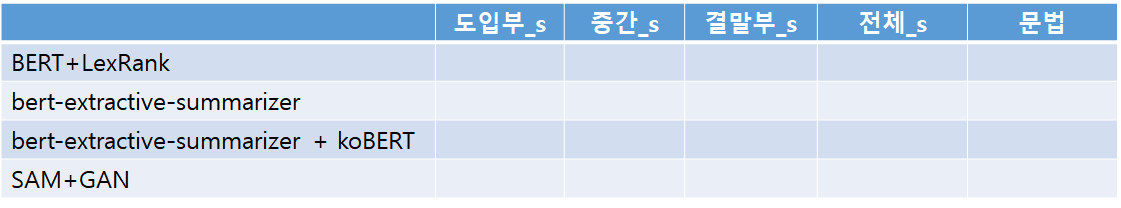

## [단문 스토리] 선녀와 나뭇꾼 이야기

* 도입부<br>
나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다.

* 중간<br>
사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연, 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다. 

* 결말부<br>
날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자, 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.

## [장문 스토리] 신데렐라

* 도입부<br>
옛날 어느 집에 귀여운 여자 아기가 태어났어요.
아기는 무럭무럭 자라서, 예쁘고 마음씨 고운 소녀가 되었어요.
그러던 어느날, 소녀의 어머니가 병이들어 그만 세상을 떠나고 말았어요.
소녀의 아버지는 홀로 남은 소녀가 걱정되었어요.
그래서 얼마 후 새어머니를 맞이했어요.
새어머니는 소녀보다 나이가 위인 두 딸을 데리고 왔어요.
그러나 새어머니와 언니들은 성질이 고약한 심술쟁이들이었어요.
새어머니는 소녀가 자기 딸들보다 예쁘고 착한 게 못마땅했어요.
그런데 이번에는 아버지마저 돌아가셨어요.
소녀는 하녀처럼 하루 종일 쓸고, 닦고, 집안일을 도맡아 했어요.
해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요.
"엄마, 저애를 신데렐라라고 불러야겠어요."
"온통 재투성이잖아요. 호호호!" 두 언니는 소녀를 놀려 댔어요.

* 중간<br>
어느 날, 왕궁에서 무도회가 열렸어요.
신데렐라의 집에도 초대장이 왔어요.
새어머니는 언니들을 데리고 무도회장으로 떠났어요.
신데렐라도 무도회에 가고 싶었어요.
혼자 남은 신데렐라는 훌쩍훌쩍 울기 시작했어요.
"신데렐라, 너도 무도회에 가고 싶니?"
신데렐라가 고개를 들어보니, 마법사 할머니가 빙그레 웃고 있었어요.
"내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴."
마법사 할머니가 주문을 외웠어요.
그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요.
이번에는 생쥐와 도마뱀을 건드렸어요.
그랬더니 생쥐는 흰말로, 도마뱀은 멋진 마부로 변했답니다.
신데렐라의 옷도 구슬 장식이 반짝이는 예쁜 드레스로 바뀌웠어요.
"신데렐라, 발을 내밀어 보거라."
할머니는 신데렐라에게 반짝반짝 빛나는 유리 구두를 신겨 주었어요.
"신데렐라, 밤 열두시가 되면 모든게 처음대로 돌아간단다. 황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼. 그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해. 알겠지?"
왕자님도 아름다운 신데렐라에게 마음을 빼았겼어요.
왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요.
신데렐라는 왕자님과 춤을 추느라 시간 가는 줄도 몰랐어요.
땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요.
신데렐라가 허둥지둥 왕궁을 빠져나가는데,
유리 구두 한 짝이 벗겨졌어요.
하지만 구두를 주울 틈이 없었어요.
신데렐라를 뛰쫓아오던 왕자님은 층계에서 유리 구두 한 짝을 주웠어요.
왕자님은 유리 구두를 가지고 임금님께 가서 말했어요.
"이 유리 구두의 주인과 결혼하겠어요."

* 결말부<br>
그래서 신하들은 유리 구두의 주인을 찾아 온 나라를 돌아다녔어요.
언니들은 발을 오므려도 보고, 구두를 늘려도 보았지만 한눈에 보기에도 유리 구두는 너무 작았어요.
그때, 신데렐라가 조용히 다가와 말했어요.
"저도 한번 신어 볼 수 있나요?"
신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
신하들은 신데렐라를 왕궁으로 데리고 갔어요.
그 뒤 신데렐라는 왕자님과 결혼하여 오래오래 행복하게 살았대요.

## 비교 대상 요약 알고리즘 준비

In [18]:
def similarity(query_text, org_text):
    sentences = nltk.sent_tokenize(org_text)
    print("Num sentences:", len(sentences))
    querys = nltk.sent_tokenize(query_text)
    print("Num querys:", len(querys))

    #Compute the sentence embeddings
    org_embeddings = s_discriminator._embedder.encode(sentences)
    query_embeddings = s_discriminator._embedder.encode(querys)

    #Compute the pair-wise cosine similarities
    cos_scores = scipy.spatial.distance.cdist(query_embeddings, org_embeddings, "cosine")
    similarity_score = 1.0 - np.mean(np.min(cos_scores,axis=0))

    return similarity_score

def grammarity(text):
    
    input_ids = []
    attention_masks = []

    sentences = np.asarray(nltk.sent_tokenize(text))
    # For every sentence...
    for sent in sentences:
        # `encode_plus` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        encoded_dict = g_discriminator.tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 64,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                            truncation = True,
                       )
        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0).to(device)
    attention_masks = torch.cat(attention_masks, dim=0).to(device)
    g_discriminator.discriminator.to(device)
    #if str(discriminator1.device) == 'cpu':
    #    pass
    #else:
    #    input_ids = input_ids.to(device)
    #    attention_masks = attention_masks.to(device)        

    with torch.no_grad():        
        outputs = g_discriminator.discriminator(input_ids, 
                               token_type_ids=None, 
                               attention_mask=attention_masks)
    #return torch.sigmoid(outputs[0][:,1])
    return torch.mean(outputs[0][:,1]).detach().cpu().numpy()
    #return outputs

In [19]:
import pandas as pd

def evaluate(method_name, text):
    result = {}
    result['method'] = [method_name]
    result['intro'] = [similarity(text,org_text_1)]
    result['body'] = [similarity(text,org_text_2)]
    result['ending'] = [similarity(text,org_text_3)]
    result['total'] = [similarity(text,org_text)]
    result['grammar'] = [float(grammarity(text))]
    return pd.DataFrame(result)

In [20]:
"""
LexRank implementation
Source: https://github.com/crabcamp/lexrank/tree/dev
"""

import numpy as np
from scipy.sparse.csgraph import connected_components

def degree_centrality_scores(
    similarity_matrix,
    threshold=None,
    increase_power=True,
):
    if not (
        threshold is None
        or isinstance(threshold, float)
        and 0 <= threshold < 1
    ):
        raise ValueError(
            '\'threshold\' should be a floating-point number '
            'from the interval [0, 1) or None',
        )

    if threshold is None:
        markov_matrix = create_markov_matrix(similarity_matrix)

    else:
        markov_matrix = create_markov_matrix_discrete(
            similarity_matrix,
            threshold,
        )

    scores = stationary_distribution(
        markov_matrix,
        increase_power=increase_power,
        normalized=False,
    )

    return scores


def _power_method(transition_matrix, increase_power=True):
    eigenvector = np.ones(len(transition_matrix))

    if len(eigenvector) == 1:
        return eigenvector

    transition = transition_matrix.transpose()

    while True:
        eigenvector_next = np.dot(transition, eigenvector)

        if np.allclose(eigenvector_next, eigenvector):
            return eigenvector_next

        eigenvector = eigenvector_next

        if increase_power:
            transition = np.dot(transition, transition)


def connected_nodes(matrix):
    _, labels = connected_components(matrix)

    groups = []

    for tag in np.unique(labels):
        group = np.where(labels == tag)[0]
        groups.append(group)

    return groups


def create_markov_matrix(weights_matrix):
    n_1, n_2 = weights_matrix.shape
    if n_1 != n_2:
        raise ValueError('\'weights_matrix\' should be square')

    row_sum = weights_matrix.sum(axis=1, keepdims=True)

    return weights_matrix / row_sum


def create_markov_matrix_discrete(weights_matrix, threshold):
    discrete_weights_matrix = np.zeros(weights_matrix.shape)
    ixs = np.where(weights_matrix >= threshold)
    discrete_weights_matrix[ixs] = 1

    return create_markov_matrix(discrete_weights_matrix)


def graph_nodes_clusters(transition_matrix, increase_power=True):
    clusters = connected_nodes(transition_matrix)
    clusters.sort(key=len, reverse=True)

    centroid_scores = []

    for group in clusters:
        t_matrix = transition_matrix[np.ix_(group, group)]
        eigenvector = _power_method(t_matrix, increase_power=increase_power)
        centroid_scores.append(eigenvector / len(group))

    return clusters, centroid_scores


def stationary_distribution(
    transition_matrix,
    increase_power=True,
    normalized=True,
):
    n_1, n_2 = transition_matrix.shape
    if n_1 != n_2:
        raise ValueError('\'transition_matrix\' should be square')

    distribution = np.zeros(n_1)

    grouped_indices = connected_nodes(transition_matrix)

    for group in grouped_indices:
        t_matrix = transition_matrix[np.ix_(group, group)]
        eigenvector = _power_method(t_matrix, increase_power=increase_power)
        distribution[group] = eigenvector

    if normalized:
        distribution /= n_1

    return distribution


* Hands-on Guide To Extractive Text Summarization With BERTSum<br>
https://analyticsindiamag.com/hands-on-guide-to-extractive-text-summarization-with-bertsum/ <br>
https://pypi.org/project/bert-extractive-summarizer/

In [21]:
!pip install bert-extractive-summarizer

In [22]:
from transformers import *

SQUAD_MODEL = "monologg/kobert"

# Load model, model config and tokenizer via Transformers
custom_config = AutoConfig.from_pretrained(SQUAD_MODEL)
custom_config.output_hidden_states=True
custom_tokenizer = AutoTokenizer.from_pretrained(SQUAD_MODEL)
custom_model = AutoModel.from_pretrained(SQUAD_MODEL, config=custom_config)

##5.2 단문 스토리 실험

In [23]:
org_text_1 = """
나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다.
"""

org_text_2 = """
사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연, 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다.
"""

org_text_3 = """
날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자, 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.
"""

org_text = org_text_1 + org_text_2 + org_text_3


###5.2.1 SAM+GAN

In [24]:
source = Source(org_text)
source.extract_keywords(s_discriminator,key_model)

------------------------------------------------------------------
나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다. 사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다. 그렇게 잠시간 기다리자 과연, 선녀들이 하늘에서 내려와 날개옷을 벗고 선녀탕에서 목욕을 하는 것이었다. 나무꾼은 사슴이 가르쳐준 대로 날개옷을 하나 훔쳤다. 날개옷이 없어진 탓에 한 명의 선녀는 하늘로 올라가지 못했으며 다른 선녀들은 날개옷이 없는 선녀를 내버려두고 하늘로 돌아갔다. 이때 나무꾼이 홀로 남은 선녀에게 자신의 아내가 되어달라고 하자, 하늘나라로 올라가지 못하게 된 선녀는 할 수 없이 나무꾼에게 의탁하게 되었다.
------------------------------------------------------------------
Token table of origin text
---------------------------------------------
 Code     Token     
  0         
  1         나무꾼이
  2         나무를
  3         하다가
  4         숲
  5         속에서
  6         도망치는
  7         사슴을
  8         만났는데,
  9         이
  10        사슴이
  11        사냥꾼이
  12        쫓아오고
  13        있으니
  

Train... |||||||||||||||||||||| 100.0%   100/100 epochs, Generator / grammar loss:-0.305538535118103   similarity loss:-0.14031192660331726


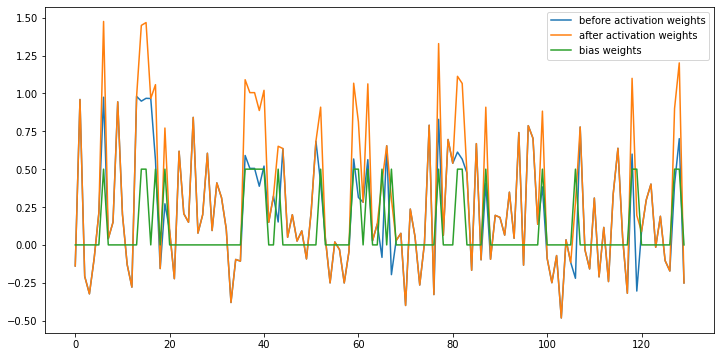

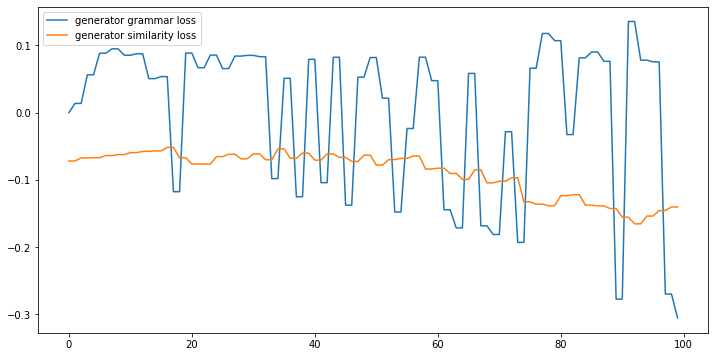

In [25]:
summarizer = SAM_Summarizer(g_discriminator,s_discriminator)
#source = Source(org_text)
summarizer.ready(source)
summarizer.summarize(epochs=100,batch_size=1,frame_expansion_ratio = 0.7,init_bias=0.5)

In [26]:
txts = summarizer.get_summary(3)

print('\n'.join(txts))
print('')
print(source.frame_text)

나무꾼이 도망치는 이 있으니 자신을 숨겨달라고 말했다. 말하는 신기하게 사슴을 온 방향으로 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 목욕을 하러 아내로 삼도록 반신반의 하면서도 가르쳐준 하러 내려온다는 과연, 하늘에서 날개옷을 벗고 선녀탕에서 목욕을 하는 나무꾼은 가르쳐준 탓에 명의 선녀는 올라가지 하늘로 아내가 하늘나라로 선녀는 의탁하게 되었다.
나무꾼이 도망치는 이 있으니 자신을 숨겨달라고 말했다. 말하는 신기하게 사슴을 온 방향으로 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 목욕을 하러 아내로 삼도록 반신반의 하면서도 가르쳐준 목욕을 내려온다는 과연, 하늘에서 날개옷을 벗고 선녀탕에서 목욕을 하는 나무꾼은 가르쳐준 탓에 명의 선녀는 올라가지 하늘로 아내가 하늘나라로 선녀는 의탁하게 되었다.
나무꾼이 도망치는 이 있으니 자신을 숨겨달라고 말했다. 말하는 신기하게 사슴을 온 방향으로 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 목욕을 하러 아내로 삼도록 반신반의 하면서도 가르쳐준 목욕을 하러 내려온다는 과연, 하늘에서 날개옷을 벗고 선녀탕에서 목욕을 하는 나무꾼은 가르쳐준 탓에 명의 선녀는 올라가지 하늘로 아내가 하늘나라로 의탁하게 되었다.

도망치는 자신을 숨겨달라고 말하는 신기하게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 목욕을 삼도록 반신반의 하면서도 가르쳐준 목욕을 내려온다는 하늘에서 선녀탕에서 목욕을 가르쳐준 올라가지 내버려두고 하늘나라로 올라가지 의탁하게 되었다. 


In [27]:
sam_gan = evaluate('SAM+GAN',txts[0])
sam_gan

Num sentences: 2
Num querys: 2
Num sentences: 4
Num querys: 2
Num sentences: 2
Num querys: 2
Num sentences: 8
Num querys: 2


,method,intro,body,ending,total,grammar
0,SAM+GAN,0.748486,0.71166,0.579871,0.687919,-0.21753


###5.2.2 BERT+LexRank

In [28]:
def bert_lexrank_sum(input_text,n_top=3):
    #Split the document into sentences
    sentences = nltk.sent_tokenize(input_text)
    print("Num sentences:", len(sentences))

    #Compute the sentence embeddings
    embeddings = s_discriminator._embedder.encode(sentences)

    #Compute the pair-wise cosine similarities
    cos_scores = scipy.spatial.distance.cdist(embeddings, embeddings, "cosine")
    #util.pytorch_cos_sim(embeddings, embeddings).numpy()
    print(cos_scores)
    #Compute the centrality for each sentence
    centrality_scores = degree_centrality_scores(cos_scores, threshold=None)

    #We argsort so that the first element is the sentence with the highest score
    most_central_sentence_indices = np.argsort(-centrality_scores)

    #Print the 5 sentences with the highest scores
    text = ""
    for idx in most_central_sentence_indices[0:n_top]:
        text += sentences[idx].strip()

    return text

text = bert_lexrank_sum(org_text)
print("\n\nSummary:")
print(text)

Num sentences: 8
[[0.00000000e+00 1.98527931e-01 4.51024659e-01 3.47108643e-01
  8.98746461e-01 3.37261646e-01 7.30052049e-01 6.03217727e-01]
 [1.98527931e-01 0.00000000e+00 4.82487276e-01 3.52954400e-01
  8.75118366e-01 3.77619475e-01 7.85524232e-01 6.78538637e-01]
 [4.51024659e-01 4.82487276e-01 0.00000000e+00 3.01469449e-01
  5.30196522e-01 3.48999266e-01 7.53490710e-01 3.94198985e-01]
 [3.47108643e-01 3.52954400e-01 3.01469449e-01 0.00000000e+00
  5.28696715e-01 4.30602956e-01 7.56651469e-01 5.62122387e-01]
 [8.98746461e-01 8.75118366e-01 5.30196522e-01 5.28696715e-01
  0.00000000e+00 7.84876415e-01 4.68763654e-01 6.49872031e-01]
 [3.37261646e-01 3.77619475e-01 3.48999266e-01 4.30602956e-01
  7.84876415e-01 0.00000000e+00 7.16583295e-01 6.14516568e-01]
 [7.30052049e-01 7.85524232e-01 7.53490710e-01 7.56651469e-01
  4.68763654e-01 7.16583295e-01 1.11022302e-16 4.20008135e-01]
 [6.03217727e-01 6.78538637e-01 3.94198985e-01 5.62122387e-01
  6.49872031e-01 6.14516568e-01 4.20008135e-01

In [29]:
bert_lexrank = evaluate('BERT+LexRank',text)
bert_lexrank

Num sentences: 2
Num querys: 1
Num sentences: 4
Num querys: 1
Num sentences: 2
Num querys: 1
Num sentences: 8
Num querys: 1


,method,intro,body,ending,total,grammar
0,BERT+LexRank,0.350815,0.571906,0.802066,0.574173,4.675514


###5.2.3 bert-extractive-summarizer

In [30]:
from summarizer import Summarizer
model1 = Summarizer()
result = model1(org_text, num_sentences=3)
summary = "".join(result)
print(summary)

bert_extractive_summarizer = evaluate('bert-extractive-summarizer',summary)
bert_extractive_summarizer


나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다.
Num sentences: 2
Num querys: 3
Num sentences: 4
Num querys: 3
Num sentences: 2
Num querys: 3
Num sentences: 8
Num querys: 3


,method,intro,body,ending,total,grammar
0,bert-extractive-summarizer,0.900736,0.78351,0.437875,0.726408,4.735662


###5.2.4 bert-extractive-summarizer+kobert

In [31]:
from summarizer import Summarizer
model2 = Summarizer(custom_model=custom_model, custom_tokenizer=custom_tokenizer)
result = model2(org_text, num_sentences=3)
summary = "".join(result)
print(summary)

bert_extractive_summarizer_kobert = evaluate('bert-extractive-summarizer+kobert',summary)
bert_extractive_summarizer_kobert 

나무꾼이 나무를 하다가 숲 속에서 도망치는 사슴을 만났는데, 이 사슴이 사냥꾼이 쫓아오고 있으니 자신을 숨겨달라고 말했다. 말하는 사슴을 신기하게 여긴 나무꾼이 사슴을 숨겨줬고, 뒤쫓아 온 사냥꾼을 다른 방향으로 보내서 구해주었다. 사슴은 은혜를 갚겠다고 하면서, 나무꾼에게 선녀들이 하늘에서 내려와서 목욕하는 선녀탕이라는 샘과 선녀들이 목욕을 하러 오는 시기, 선녀의 옷을 훔쳐 그를 아내로 삼도록 하는 꾀를 나무꾼에게 가르쳐 주었다. 나무꾼은 반신반의 하면서도 사슴이 가르쳐준 시기에 선녀들이 목욕을 하러 내려온다는 샘으로 찾아가 몸을 숨겼다.
Num sentences: 2
Num querys: 4
Num sentences: 4
Num querys: 4
Num sentences: 2
Num querys: 4
Num sentences: 8
Num querys: 4


,method,intro,body,ending,total,grammar
0,bert-extractive-summarizer+kobert,1.0,0.78351,0.437875,0.751224,4.670466


###5.2.5 단문에 대한 요약 비교 결과

In [32]:
result = pd.concat([sam_gan, bert_lexrank, bert_extractive_summarizer, bert_extractive_summarizer_kobert ], ignore_index=True)
result

,method,intro,body,ending,total,grammar
0,SAM+GAN,0.748486,0.711660,0.579871,0.687919,-0.217530
1,BERT+LexRank,0.350815,0.571906,0.802066,0.574173,4.675514
2,bert-extractive-summarizer,0.900736,0.783510,0.437875,0.726408,4.735662
3,bert-extractive-summarizer+kobert,1.000000,0.783510,0.437875,0.751224,4.670466


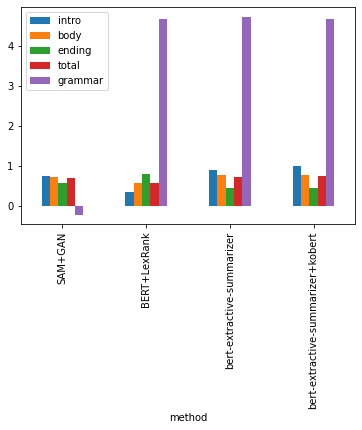

In [33]:
result.plot.bar(x='method')

##5.3 장문 스토리 실험

In [34]:
org_text_1 = """
옛날 어느 집에 귀여운 여자 아기가 태어났어요.
아기는 무럭무럭 자라서, 예쁘고 마음씨 고운 소녀가 되었어요.
그러던 어느날, 소녀의 어머니가 병이들어 그만 세상을 떠나고 말았어요.
소녀의 아버지는 홀로 남은 소녀가 걱정되었어요.
그래서 얼마 후 새어머니를 맞이했어요.
새어머니는 소녀보다 나이가 위인 두 딸을 데리고 왔어요.
그러나 새어머니와 언니들은 성질이 고약한 심술쟁이들이었어요.
새어머니는 소녀가 자기 딸들보다 예쁘고 착한 게 못마땅했어요.
그런데 이번에는 아버지마저 돌아가셨어요.
소녀는 하녀처럼 하루 종일 쓸고, 닦고, 집안일을 도맡아 했어요.
해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요.
"""

org_text_2 = """
어느 날, 왕궁에서 무도회가 열렸어요.
신데렐라의 집에도 초대장이 왔어요.
새어머니는 언니들을 데리고 무도회장으로 떠났어요.
신데렐라도 무도회에 가고 싶었어요.
혼자 남은 신데렐라는 훌쩍훌쩍 울기 시작했어요.
신데렐라, 너도 무도회에 가고 싶니?
신데렐라가 고개를 들어보니, 마법사 할머니가 빙그레 웃고 있었어요.
내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴.
마법사 할머니가 주문을 외웠어요.
그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요.
이번에는 생쥐와 도마뱀을 건드렸어요.
그랬더니 생쥐는 흰말로, 도마뱀은 멋진 마부로 변했답니다.
신데렐라의 옷도 구슬 장식이 반짝이는 예쁜 드레스로 바뀌웠어요.
신데렐라, 발을 내밀어 보거라.
할머니는 신데렐라에게 반짝반짝 빛나는 유리 구두를 신겨 주었어요.
신데렐라, 밤 열두시가 되면 모든게 처음대로 돌아간단다. 황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼. 그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해. 알겠지?
왕자님도 아름다운 신데렐라에게 마음을 빼았겼어요.
왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요.
신데렐라는 왕자님과 춤을 추느라 시간 가는 줄도 몰랐어요.
땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요.
신데렐라가 허둥지둥 왕궁을 빠져나가는데,
유리 구두 한 짝이 벗겨졌어요.
하지만 구두를 주울 틈이 없었어요.
신데렐라를 뛰쫓아오던 왕자님은 층계에서 유리 구두 한 짝을 주웠어요.
왕자님은 유리 구두를 가지고 임금님께 가서 말했어요.
이 유리 구두의 주인과 결혼하겠어요.
"""

org_text_3 = """
그래서 신하들은 유리 구두의 주인을 찾아 온 나라를 돌아다녔어요.
언니들은 발을 오므려도 보고, 구두를 늘려도 보았지만 한눈에 보기에도 유리 구두는 너무 작았어요.
그때, 신데렐라가 조용히 다가와 말했어요.
저도 한번 신어 볼 수 있나요?
신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
신하들은 신데렐라를 왕궁으로 데리고 갔어요.
그 뒤 신데렐라는 왕자님과 결혼하여 오래오래 행복하게 살았대요.
"""

org_text = org_text_1 + org_text_2 + org_text_3

###5.3.1 SAM+GAN

In [35]:
source = Source(org_text)
source.extract_keywords(s_discriminator,key_model)


------------------------------------------------------------------
옛날 어느 집에 귀여운 여자 아기가 태어났어요. 아기는 무럭무럭 자라서, 예쁘고 마음씨 고운 소녀가 되었어요. 그러던 어느날, 소녀의 어머니가 병이들어 그만 세상을 떠나고 말았어요. 소녀의 아버지는 홀로 남은 소녀가 걱정되었어요. 그래서 얼마 후 새어머니를 맞이했어요. 새어머니는 소녀보다 나이가 위인 두 딸을 데리고 왔어요. 그러나 새어머니와 언니들은 성질이 고약한 심술쟁이들이었어요. 새어머니는 소녀가 자기 딸들보다 예쁘고 착한 게 못마땅했어요. 그런데 이번에는 아버지마저 돌아가셨어요. 소녀는 하녀처럼 하루 종일 쓸고, 닦고, 집안일을 도맡아 했어요. 해도 해도 끝이 없는 집안일이 힘들어 지칠때면 난롯가에 앉아서 잠시 쉬곤 했지요. 어느 날, 왕궁에서 무도회가 열렸어요. 신데렐라의 집에도 초대장이 왔어요. 새어머니는 언니들을 데리고 무도회장으로 떠났어요. 신데렐라도 무도회에 가고 싶었어요. 혼자 남은 신데렐라는 훌쩍훌쩍 울기 시작했어요. 신데렐라, 너도 무도회에 가고 싶니? 신데렐라가 고개를 들어보니, 마법사 할머니가 빙그레 웃고 있었어요. 내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴. 마법사 할머니가 주문을 외웠어요. 그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요. 이번에는 생쥐와 도마뱀을 건드렸어요. 그랬더니 생쥐는 흰말로, 도마뱀은 멋진 마부로 변했답니다. 신데렐라의 옷도 구슬 장식이 반짝이는 예쁜 드레스로 바뀌웠어요. 신데렐라, 발을 내밀어 보거라. 할머니는 신데렐라에게 반짝반짝 빛나는 유리 구두를 신겨 주었어요. 신데렐라, 밤 열두시가 되면 모든게 처음대로 돌아간단다. 황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼. 그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해. 알겠지? 왕자님도 아름다운 신데렐라에게 마음을 빼았겼어요. 왕자님은 무도회장에 모인 다른 

Train... |||||||||||||||||||||| 100.0%   100/100 epochs, Generator / grammar loss:-0.32677754759788513   similarity loss:-0.1072918027639389


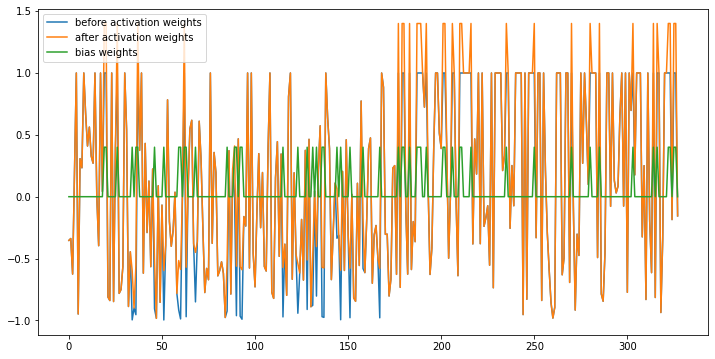

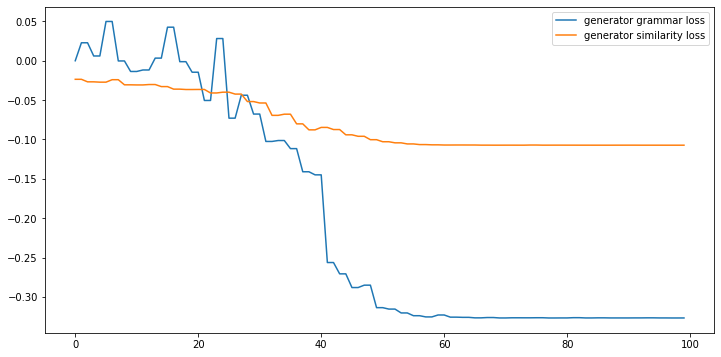

귀여운 아기는 소녀가 어느날, 어머니가 병이들어 떠나고 아버지는 걱정되었어요. 소녀보다 위인 소녀는 힘들어 떠났어요. 무도회에 너도 있었어요. 건드리자, 신데렐라에게 열두시가 모든게 처음대로 마차는 마부는 도마뱀으로 변하게 돼. 반드시 전에 돌아와야 왕자님도 아름다운 왕자님은 무도회장에 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요. 신데렐라는 왕자님과 가는 몰랐어요. 열두 알리는 소리에 신데렐라는 화들짝 허둥지둥 왕궁을 한 짝이 벗겨졌어요. 하지만 주울 없었어요. 신데렐라를 뛰쫓아오던 왕자님은 유리 구두 짝을 가서 말했어요. 이 주인과 결혼하겠어요. 신하들은 온 돌아다녔어요. 오므려도 보고, 구두를 늘려도 한눈에 너무 작았어요. 신데렐라가 한번 볼 있나요? 신하게 유리 구두를 신었어요, 발에 신하들은 왕궁으로 데리고 뒤 신데렐라는 왕자님과 결혼하여 행복하게 살았대요.
귀여운 아기는 소녀가 어느날, 어머니가 병이들어 떠나고 아버지는 걱정되었어요. 소녀보다 위인 소녀는 힘들어 떠났어요. 무도회에 너도 있었어요. 건드리자, 신데렐라에게 열두시가 모든게 처음대로 마차는 마부는 도마뱀으로 변하게 돼. 반드시 전에 돌아와야 왕자님도 아름다운 왕자님은 무도회장에 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요. 신데렐라는 왕자님과 가는 몰랐어요. 열두 알리는 소리에 신데렐라는 화들짝 허둥지둥 왕궁을 한 짝이 벗겨졌어요. 하지만 주울 없었어요. 신데렐라를 뛰쫓아오던 왕자님은 유리 구두 짝을 가서 말했어요. 이 주인과 결혼하겠어요. 신하들은 온 돌아다녔어요. 오므려도 보고, 구두를 늘려도 한눈에 너무 작았어요. 신데렐라가 한번 볼 있나요? 신하게 유리 구두를 신었어요, 발에 신하들은 왕궁으로 데리고 뒤 신데렐라는 왕자님과 결혼하여 행복하게 살았대요.
귀여운 아기는 소녀가 어느날, 어머니가 병이들어 떠나고 아버지는 걱정되었어요. 소녀보다 위인 소녀는 힘들어 떠났어요. 무도회에 너도 있었어요. 건드리자, 신데렐라에게 열두시가 모든게 처음대로 마차는 마부는 도마뱀

In [36]:
summarizer = SAM_Summarizer(g_discriminator,s_discriminator)
#source = Source(org_text)
summarizer.ready(source)
summarizer.summarize(epochs=100,batch_size=1,frame_expansion_ratio = 0.7,init_bias=0.4)

txts = summarizer.get_summary(3)

print('\n'.join(txts))
print('')
print(source.frame_text)

In [37]:
sam_gan = evaluate('SAM+GAN',txts[0])
sam_gan

Num sentences: 11
Num querys: 14
Num sentences: 28
Num querys: 14
Num sentences: 7
Num querys: 14
Num sentences: 46
Num querys: 14


,method,intro,body,ending,total,grammar
0,SAM+GAN,0.528157,0.658343,0.681639,0.630757,3.716439


###5.3.2 BERT+LexRank

In [38]:
text = bert_lexrank_sum(org_text,n_top=10)
print("\n\nSummary:")
print(text)

Num sentences: 46
[[0.         0.38204615 0.49504121 ... 0.68205056 0.61611683 0.62742191]
 [0.38204615 0.         0.73639959 ... 0.62604466 0.73538013 0.62594273]
 [0.49504121 0.73639959 0.         ... 0.82806575 0.81571041 0.86315465]
 ...
 [0.68205056 0.62604466 0.82806575 ... 0.         0.4442605  0.49476858]
 [0.61611683 0.73538013 0.81571041 ... 0.4442605  0.         0.29959817]
 [0.62742191 0.62594273 0.86315465 ... 0.49476858 0.29959817 0.        ]]


Summary:
알겠지?해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요.그런데 이번에는 아버지마저 돌아가셨어요.이번에는 생쥐와 도마뱀을 건드렸어요.내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴.그러니까 반드시 밤 열두 시가 되기 전에 돌아와야 해.황금 마차는 호박으로, 흰말은 생쥐로, 마부는 도마뱀으로 변하게 돼.저도 한번 신어 볼 수 있나요?하지만 구두를 주울 틈이 없었어요.그리고 지팡이로 호박을 건드리자, 호박이 화려한 황금 마차로 변했어요.


In [39]:
bert_lexrank = evaluate('BERT+LexRank',text)
bert_lexrank

Num sentences: 11
Num querys: 1
Num sentences: 28
Num querys: 1
Num sentences: 7
Num querys: 1
Num sentences: 46
Num querys: 1


,method,intro,body,ending,total,grammar
0,BERT+LexRank,0.225772,0.244255,0.181226,0.230244,4.80504


###5.3.3 bert-extractive-summarizer


In [40]:
model1 = Summarizer()
result = model1(org_text, num_sentences=5)
summary = "".join(result)
print(summary)

bert_extractive_summarizer = evaluate('bert-extractive-summarizer',summary)
bert_extractive_summarizer


해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요. 내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴. 왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요. 땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요. 신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
Num sentences: 11
Num querys: 5
Num sentences: 28
Num querys: 5
Num sentences: 7
Num querys: 5
Num sentences: 46
Num querys: 5


,method,intro,body,ending,total,grammar
0,bert-extractive-summarizer,0.411179,0.611856,0.599732,0.562023,4.594555


###5.3.4 bert-extractive-summarizer + koBERT

In [41]:
model2 = Summarizer(custom_model=custom_model, custom_tokenizer=custom_tokenizer)
result = model2(org_text, num_sentences=5)
summary = "".join(result)
print(summary)

bert_extractive_summarizer_kobert = evaluate('bert-extractive-summarizer+kobert',summary)
bert_extractive_summarizer_kobert 

해도 해도 끝이 없는 집안일이 힘들어 지칠때면
난롯가에 앉아서 잠시 쉬곤 했지요. 내가 너를 무도회에 보내주마 호박 한개와 생쥐 두마리, 도마뱀을 구해 오렴. 왕자님은 무도회장에 모인 다른 아가씨들은 쳐다보지도 않고,신데렐라하고만 춤을 추었어요. 땡, 땡, 땡...... 벽시계가 열두 시를 알리는 소리에 신데렐라는 화들짝 놀랐어요. 신데렐라는 신하게 건넨 유리 구두를 신었어요,
유리 구두는 신데렐라의 발에 꼭 맞았어요.
Num sentences: 11
Num querys: 5
Num sentences: 28
Num querys: 5
Num sentences: 7
Num querys: 5
Num sentences: 46
Num querys: 5


,method,intro,body,ending,total,grammar
0,bert-extractive-summarizer+kobert,0.411179,0.611856,0.599732,0.562023,4.594555


### 5.3.5 장문에 대한 요약 비교 결과

In [42]:
result = pd.concat([sam_gan, bert_lexrank, bert_extractive_summarizer, bert_extractive_summarizer_kobert ], ignore_index=True)
result

,method,intro,body,ending,total,grammar
0,SAM+GAN,0.528157,0.658343,0.681639,0.630757,3.716439
1,BERT+LexRank,0.225772,0.244255,0.181226,0.230244,4.805040
2,bert-extractive-summarizer,0.411179,0.611856,0.599732,0.562023,4.594555
3,bert-extractive-summarizer+kobert,0.411179,0.611856,0.599732,0.562023,4.594555


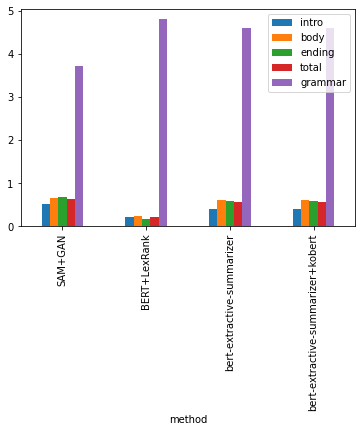

In [43]:
result.plot.bar(x='method')

# 6. Conclution

비교적 단문에서는 Extractive 방법과 대등소이한 결과를 보였으나, 장문에서는 Extractive보다 Similarity가 도입, 본문, 결말부 모두 높게 나타났다. 그러나, grammarlity는 가장 낮았다. 이는, 주요 어절을 기반으로 문법에 맞게 적당한 어절을 만들어내는 기본 알고리즘 구조상 나타나는 현상이다. 
 일반 DNN구조로 만들어진 Generator이기 때문에 문법 구성이 부드럽지 못했다. 하지만 미분 가능한 구조가 아닌 문법 Discriminator에 대해 변형된 WGAN을 적용하여 Generator를 학습 가능하게 한 방법은 Generator을 LSTM 으로 변경하여도 적용 가능할 것이며, DNN에 비해 부드러운 문법 구성을 할 것으로 기대한다.
 

## Reference

[1] Rada Mihalcea and Paul Tarau, (????). TextRank: Bringing Order into Texts <br>
[2] G¨une¸s Erkan. (2004). LexRank: Graph-based Lexical Centrality as Salience in Text Summarization <br>
[3] Susan T. Dumais (2005). "Latent Semantic Analysis". Annual Review of Information Science and Technology. 38: 188–230. <br>
[4] Hans Peter Luhn (1960). Keyword-in-context index for technical literature. American Documentation, 11(4):288–295. ISSN 0002-823 <br>
[5] Aria Haghighi, (2009). Exploring Content Models for Multi-Document Summarization <br>
[6] Colin Raffel. (2020). Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer <br>
[7] Mike Lewis, (2019). BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension <br>
[8] Alec Radford, (2018). Language Models are Unsupervised Multitask Learners <br>
[9] Guillaume Lample, (2019). Cross-lingual Language Model Pretraining <br>
[10] Nils Reimers and Iryna Gurevych, (2019). Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks <br>
[11] Sharma, P., & Li, Y. (2019). Self-Supervised Contextual Keyword and Keyphrase Retrieval with Self-Labelling <br>
[12] Jacob Devlin, (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding <br>
[13] Ian J. Goodfellow, (2014). Generative Adversarial Nets <br>
[14] Yau-ShianWang, (2018). Learning to Encode Text as Human-Readable Summaries using Generative Adversarial Networks <br>
[15] Martin Arjovsky, (2017). Wasserstein GAN <br>